# Úkol č. 2 - Využití neuronových sítí

  * Termíny jsou uvedeny na [courses.fit.cvut.cz/BI-ML2/homeworks/index.html](https://courses.fit.cvut.cz/BI-ML2/homeworks/index.html).
  * Pokud odevzdáte úkol po prvním termínu ale před nejzazším termínem, budete penalizování -12 body, pozdější odevzdání je bez bodu.
  * V rámci tohoto úkolu musíte sestrojit vhodný model neuronové sítě pro vícetřídou klasifikaci.
  * Část bodů získáte za správné vypracování a část bodů získáte za výslednou přesnost Vašeho modelu na evaluačních datech.
    
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

Využívejte buňky typu `Markdown` k vysvětlování Vašeho postupu. Za nepřehlednost budou strhávány body.

## Zdroj dat

 * Zdrojem dat jsou soubory `train.csv` a `evaluate.csv`.
 * Jedná se o obrázky 32x32 pixelů ve stupních šedi, které byly nějakým způsobem vyrobeny z [Fashion Mnist datasetu](https://www.kaggle.com/datasets/zalando-research/fashionmnist).
 * Soubor `train.csv` obsahuje trénovací data.
 * Cílová (vysvětlovaná) proměnná se jmenuje **label**.
 * Soubor `evaluate.csv` obsahuje testovací data bez hodnot skutečných labelů.

## Pokyny k vypracování (max 18 bodů)

**Body zadání**, za jejichž (poctivé) vypracování získáte **18 bodů**:
  * V notebooku načtěte data ze souboru `train.csv`. Vhodným způsobem si je rozdělte na podmnožiny, které Vám poslouží pro trénování, porovnávání modelů a následnou predikci výkonnosti finálního modelu.
  * Proveďte základní průzkum dat a svá pozorování diskutujte. Některé obrázky také zobrazte.
  * Sestrojte a natrénujte několik variant modelu dopředné neuronové sítě. Přitom v rámci výpočetních možností:
      * Okomentujte vhodnost daného modelu pro daný typ úlohy.
      * Experimentujte s různými hloubkami a velikosmi vrstev.
      * Experimentujte se standardizací/normalizací dat.
      * Experimentujte s různými optimalizačními metodami.
      * Experimentujte s různými regularizačními technikami.
      * Získané výsledky vždy řádně okomentujte.
<br/><br/>
  * Sestrojte model konvoluční neuronové sítě. Přitom v rámci výpočetních možností:
      * Okomentujte vhodnost daného modelu pro daný typ úlohy.
      * Experimentujte s různými hloubkami a velikosmi vrstev.
      * Experimentujte se standardizací/normalizací dat.
      * Experimentujte s různými optimalizačními metodami.
      * Experimentujte s různými regularizačními technikami.
      * Získané výsledky vždy řádně okomentujte.
    <br/><br/>
  * Ze všech zkoušených možností vyberte finální model a odhadněte, jakou přesnost můžete očekávat na nových datech, která jste doposud neměli k dispozici.
  
  * Nakonec načtěte vyhodnocovací data ze souboru`evaluate.csv`. Pomocí finálního modelu napočítejte predikce pro tyto data (vysvětlovaná proměnná v nich již není). Vytvořte soubor `results.csv`, ve kterém získané predikce uložíte do sloupce **label** a identifikátory do sloupce **ID**. Tento soubor též odevzdejte (uložte do projektu vedle notebooku).
   
   * Ukázka prvních řádků souboru `results.csv`:
  
```
ID,label
0,0
1,1
...
```

## Vyhodnocovací část (max 7 bodů)
Za přesnost (accuraccy) na odevzdaných predikcích pro vyhodnocovací množnu získáte dalších max **7 bodů**.

Označíme-li $A$ přesnost, které jste dosáhli, zaokrouhlenou na 2 desetinná místa, akumulují se výsledné body podle následujících pravidel:
* pokud $A \geq 0.80$ obdržíte +1 bod
* pokud $A \geq 0.83$ obdržíte +1 bod
* pokud $A \geq 0.86$ obdržíte +1 bod
* pokud $A \geq 0.87$ obdržíte +1 bod
* pokud $A \geq 0.88$ obdržíte +1 bod
* pokud $A \geq 0.89$ obdržíte +1 bod
* pokud $A \geq 0.90$ obdržíte +1 bod

**Příklad:** Pokud bude Vaše přesnost 0.856, vyjde A = 0.86 a vy získáte 3 body.


## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-ML2/homeworks/index.html.
  * Vytvořte i csv soubor `results.csv` s predikcemi a uložte ho v rámci projektu vedle ipython notebooku.

Importing all necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import time
import torch 
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader, random_split

## Data Preprocessing

Reading training data and saving it to `data` variable:

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52500 entries, 0 to 52499
Columns: 1025 entries, pix1 to label
dtypes: int64(1025)
memory usage: 410.6 MB


In [4]:
data["label"].unique()

array([7, 0, 6, 3, 4, 8, 1, 9, 2, 5])

To manually identify unique labels, I am going to visualize 5 pictures per label to understand given dataset better:

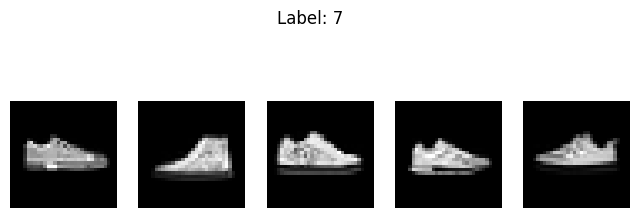

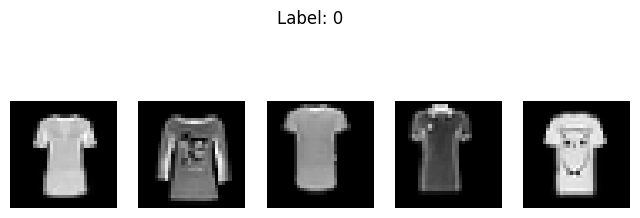

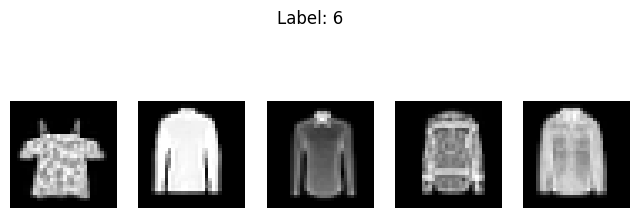

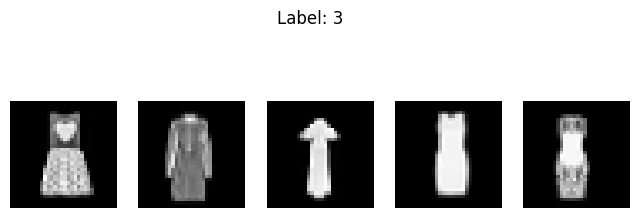

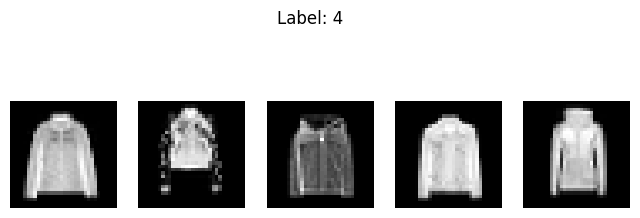

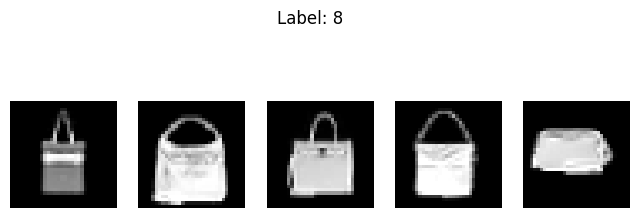

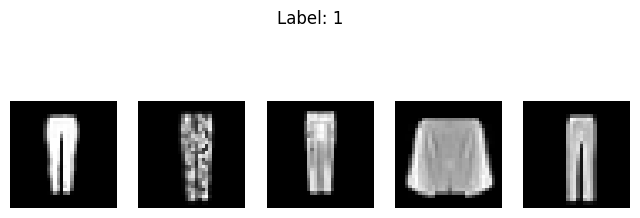

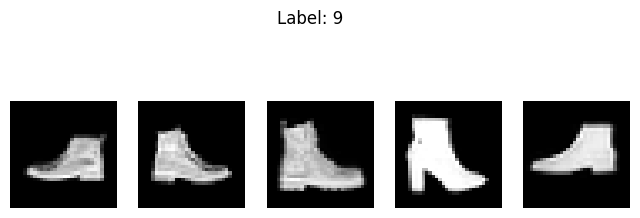

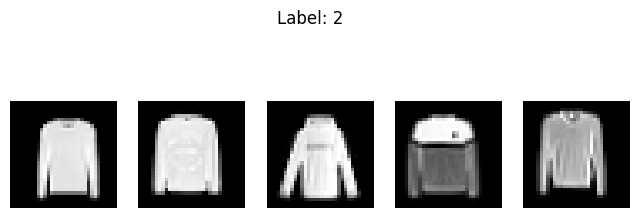

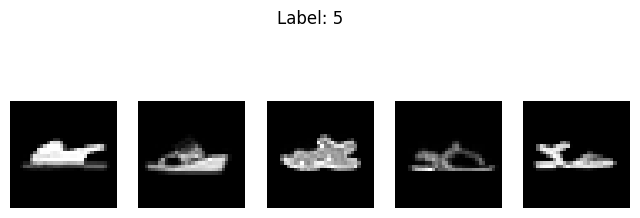

In [5]:
labels = data['label'].unique()

for label in labels:
    images = data[data['label'] == label].iloc[:5, :1024]

    fig, axs = plt.subplots(1, 5, figsize=(8, 3))

    for img, ax in zip(images.values, axs):
        ax.imshow(img.reshape(32, 32), cmap='gray')
        ax.axis('off')

    plt.suptitle(f"Label: {label}")

## Data Splitting

I am going to define a function for data splitting so that I can use it for both model types later. I am using a standard data split of 60-20-20 (train-validation-test), as we have enough data for that.

In [6]:
def prepare_data(X, y, batch_size=64):
    
    dataset = TensorDataset(X, y)
    
    train_ratio, val_ratio = 0.6, 0.2
    n_all = len(dataset)
    n_train = int(n_all * train_ratio)
    n_val = int(n_all * val_ratio)
    n_test = int(n_all * val_ratio)
    
    print(f"Full dataset size: {n_all}, Train size: {n_train}, Val size: {n_val}, Test size: {n_test}")
    
    generator = torch.Generator().manual_seed(111)
    train_data, val_data, test_data = random_split(dataset, [n_train, n_val, n_test], generator=generator)
    
    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_data, batch_size=batch_size)
    test_loader = DataLoader(test_data, batch_size=batch_size)
    
    return train_loader, val_loader, test_loader

Splitting the data for both models:

In [7]:
X = torch.tensor(data.drop('label', axis=1).values, dtype=torch.float32) / 255.0
y = torch.tensor(data['label'].values, dtype=torch.long)


train_loader_fnn, val_loader_fnn, test_loader_fnn = prepare_data(X, y)

# reshaping for cnn
X_reshaped = X.view(-1, 1, 32, 32)
train_loader_cnn, val_loader_cnn, test_loader_cnn = prepare_data(X_reshaped, y)

Full dataset size: 52500, Train size: 31500, Val size: 10500, Test size: 10500
Full dataset size: 52500, Train size: 31500, Val size: 10500, Test size: 10500


## Model Training

### Feedforward Neural Network

Fully connected (feedforward) neural networks are a reasonable starting point for image classification. However, they tend to ignore spatial structures (like pixel neighborhoods), so a Convolutional Neural Network (CNN) is expected to perform better for this type of data (implemented below)

Choosing **CPU** for FNNs is often **better** because FNNs are relatively simple compared to more complex models like CNNs or RNNs. Also, FNNs typically don't require the massive parallel processing power of GPUs, making CPUs a **more cost-effective and practical option** for training and inference.

In [8]:
myDevice = torch.device('cpu')

I am going to define A FeedForward class to represent a fully connected neural network that can have multiple hidden layers, dropout, and batch normalization.
It first **flattens the input** image (32×32 pixels → 1024 features) and then processes it through a series of linear layers with activation functions and regularization.

In [9]:
class FeedForwardNN(nn.Module):
    def __init__(self, input_size, hidden_sizes, num_classes, dropout_rate=0.5):
        super(FeedForwardNN, self).__init__()
        self.flatten = nn.Flatten()
        
        # Build layers dynamically
        layers = []
        prev_size = input_size
        
        for hidden_size in hidden_sizes:
            layers.append(nn.Linear(prev_size, hidden_size))
            layers.append(nn.ReLU())
            layers.append(nn.BatchNorm1d(hidden_size))
            layers.append(nn.Dropout(dropout_rate))
            prev_size = hidden_size
        
        # Output layer
        layers.append(nn.Linear(prev_size, num_classes))
        
        self.model = nn.Sequential(*layers)
    
    def forward(self, x):
        x = self.flatten(x)
        return self.model(x)

I am going to define a function for training a neural network by running **multiple epochs** where the model learns from the training data and is evaluated on a validation set. The function is **tracking metrics** like loss and accuracy for both training and validation. **Early stopping** is implemented to halt training if the validation accuracy doesn’t improve after a certain number of epochs, preventing overfitting. It is also plotting the training and validation accuracies to visualize progress.

In [10]:
def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler=None, 
                num_epochs=10, device=myDevice):
    model = model.to(device)
    
    # For storing metrics
    val_losses = []
    train_accs = []
    val_accs = []
    
    # For early stopping
    best_val_acc = 0
    best_model_state = None
    patience = 3
    counter = 0
    
    print(f"Training on {device}...")
    for epoch in range(num_epochs):
        start_time = time.time()
        
        # Training
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            # Zero the parameter gradients
            optimizer.zero_grad()
            
            # Forward
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            # Backward + optimize
            loss.backward()
            optimizer.step()
            
            # Statistics
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        train_acc = 100 * correct / total
        
        # Validation
        model.eval()
        running_loss = 0.0
        correct = 0
        total = 0
        
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                
                running_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        
        val_loss = running_loss / len(val_loader)
        val_acc = 100 * correct / total
        
        # Update learning rate if scheduler is provided
        if scheduler is not None:
            if isinstance(scheduler, optim.lr_scheduler.ReduceLROnPlateau):
                scheduler.step(val_loss)
            else:
                scheduler.step()
        
        # Save metrics
        val_losses.append(val_loss)
        train_accs.append(train_acc)
        val_accs.append(val_acc)
        
        # Early stopping
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            # Simply save the model state in memory
            best_model_state = model.state_dict().copy()
            counter = 0
        else:
            counter += 1
            
        # Print statistics
        time_elapsed = time.time() - start_time
        print(f'Epoch {epoch+1}/{num_epochs} | '
              f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}% | '
              f'Time: {time_elapsed:.2f}s')
        
        if counter >= patience:
            print('Early stopping!')
            break
    
    # Load best model state
    if best_model_state:
        model.load_state_dict(best_model_state)
    
    plt.plot(train_accs, label='Train Acc')
    plt.plot(val_accs, label='Val Acc')
    plt.title('Accuracy Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    return model, best_val_acc

Here, the **evaluation function** is defined, which evaluates the performance of the trained model on the test dataset. It also generates a **confusion matrix**, which visually shows how well the model performed for each class by displaying true positive, false positive, true negative, and false negative predictions.

In [11]:
def evaluate_model(model, test_loader, device=myDevice):
    model = model.to(device)
    model.eval()
    
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    # Calculate accuracy
    accuracy = accuracy_score(all_labels, all_preds)
    print(f"Test Accuracy: {accuracy:.4f}")
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(all_labels, all_preds, normalize='true')
    sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues')
    plt.title(f'Confusion Matrix (Accuracy: {accuracy:.4f})')
    plt.ylabel('True Labels')
    plt.xlabel('Predicted Labels')
    plt.show()
    
    return accuracy

The following function defines all the models I am going to use, trains them and evaluates the best one.

In [12]:
def run_experiments_fnn():
    device = myDevice
    print(f"Using device: {device}")
    
    # Define hyperparameters
    input_size = 32 * 32
    num_classes = 10
    num_epochs = 15
    
    # Define model configurations to try
    fnn_models = {
        "FNN-1": {"hidden_sizes": [128], "dropout": 0.3},
        "FNN-2": {"hidden_sizes": [256, 128], "dropout": 0.3},
        "FNN-3": {"hidden_sizes": [512, 256], "dropout": 0.3},
        "FNN-4": {"hidden_sizes": [512, 256, 128], "dropout": 0.4},
        "FNN-5": {"hidden_sizes": [1024, 512, 256], "dropout": 0.5}
    }
    
    # Store results and models
    model_results = {}
    trained_models = {}
    
    # Train each model and select based on validation accuracy
    for model_name, config in fnn_models.items():
        print(f"\n=== Training {model_name} ===")
        print(f"Architecture: {config['hidden_sizes']}, Dropout: {config['dropout']}")
        
        # Create model
        model = FeedForwardNN(
            input_size=input_size,
            hidden_sizes=config['hidden_sizes'],
            num_classes=num_classes,
            dropout_rate=config['dropout']
        )
        
        # Define loss and optimizer
        criterion = nn.CrossEntropyLoss()
        
        # Try different optimizers for different models
        if model_name in ["FNN-1", "FNN-3", "FNN-5"]:
            optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
            scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=2, factor=0.5)
        else:
            optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-4)
            scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)
        
        # Train the model
        trained_model, val_acc = train_model(
            model=model,
            train_loader=train_loader_fnn,
            val_loader=val_loader_fnn,
            criterion=criterion,
            optimizer=optimizer,
            scheduler=scheduler,
            num_epochs=num_epochs,
            device=device
        )
        
        # Store results and model
        model_results[model_name] = val_acc
        trained_models[model_name] = trained_model
    
    # Compare all models based on validation accuracy
    print("\n=== Model Comparison (Validation Accuracy) ===")
    print(f"{'Model':<10} {'Validation Acc':<15}")
    print("-" * 25)
    
    for name, val_acc in model_results.items():
        print(f"{name:<10} {val_acc:.2f}%")
    
    # Find the best model based on validation accuracy
    best_model_name = max(model_results, key=model_results.get)
    best_val_acc = model_results[best_model_name]
    best_model = trained_models[best_model_name]
    
    print(f"\n=== Best Model (by validation accuracy) ===")
    print(f"Best model: {best_model_name} with validation accuracy: {best_val_acc:.2f}%")
    
    # Now evaluate the best model on the test set
    print(f"\n=== Evaluating Best Model ({best_model_name}) on Test Set ===")
    test_acc = evaluate_model(best_model, test_loader_fnn, device)
    
    return best_model, best_model_name, test_acc

Using device: cpu

=== Training FNN-1 ===
Architecture: [128], Dropout: 0.3
Training on cpu...
Epoch 1/15 | Val Loss: 0.6170, Val Acc: 77.94% | Time: 2.98s
Epoch 2/15 | Val Loss: 0.5826, Val Acc: 79.78% | Time: 1.12s
Epoch 3/15 | Val Loss: 0.5639, Val Acc: 79.62% | Time: 1.11s
Epoch 4/15 | Val Loss: 0.5404, Val Acc: 80.34% | Time: 1.11s
Epoch 5/15 | Val Loss: 0.5259, Val Acc: 80.93% | Time: 1.16s
Epoch 6/15 | Val Loss: 0.5152, Val Acc: 81.14% | Time: 1.11s
Epoch 7/15 | Val Loss: 0.5217, Val Acc: 81.10% | Time: 1.14s
Epoch 8/15 | Val Loss: 0.4972, Val Acc: 81.92% | Time: 1.16s
Epoch 9/15 | Val Loss: 0.5119, Val Acc: 81.52% | Time: 1.12s
Epoch 10/15 | Val Loss: 0.4897, Val Acc: 82.53% | Time: 1.20s
Epoch 11/15 | Val Loss: 0.4939, Val Acc: 81.99% | Time: 1.17s
Epoch 12/15 | Val Loss: 0.4927, Val Acc: 81.94% | Time: 1.15s
Epoch 13/15 | Val Loss: 0.4782, Val Acc: 82.87% | Time: 1.11s
Epoch 14/15 | Val Loss: 0.4806, Val Acc: 82.27% | Time: 1.12s
Epoch 15/15 | Val Loss: 0.4858, Val Acc: 82.36

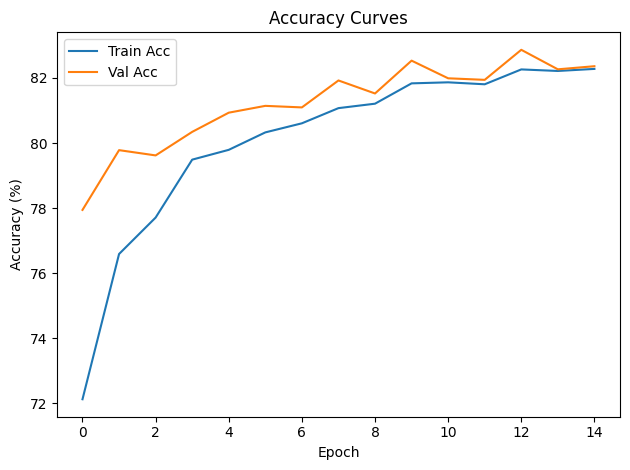


=== Training FNN-2 ===
Architecture: [256, 128], Dropout: 0.3
Training on cpu...
Epoch 1/15 | Val Loss: 0.6002, Val Acc: 78.06% | Time: 1.29s
Epoch 2/15 | Val Loss: 0.5781, Val Acc: 78.90% | Time: 1.30s
Epoch 3/15 | Val Loss: 0.5623, Val Acc: 78.88% | Time: 1.24s
Epoch 4/15 | Val Loss: 0.5008, Val Acc: 81.15% | Time: 1.31s
Epoch 5/15 | Val Loss: 0.4920, Val Acc: 81.44% | Time: 1.29s
Epoch 6/15 | Val Loss: 0.4894, Val Acc: 81.71% | Time: 1.30s
Epoch 7/15 | Val Loss: 0.4806, Val Acc: 81.95% | Time: 1.29s
Epoch 8/15 | Val Loss: 0.4809, Val Acc: 82.05% | Time: 1.33s
Epoch 9/15 | Val Loss: 0.4834, Val Acc: 81.84% | Time: 1.24s
Epoch 10/15 | Val Loss: 0.4801, Val Acc: 82.12% | Time: 1.28s
Epoch 11/15 | Val Loss: 0.4790, Val Acc: 82.03% | Time: 1.36s
Epoch 12/15 | Val Loss: 0.4786, Val Acc: 82.15% | Time: 1.26s
Epoch 13/15 | Val Loss: 0.4788, Val Acc: 82.10% | Time: 1.27s
Epoch 14/15 | Val Loss: 0.4817, Val Acc: 81.90% | Time: 1.31s
Epoch 15/15 | Val Loss: 0.4798, Val Acc: 82.11% | Time: 1.2

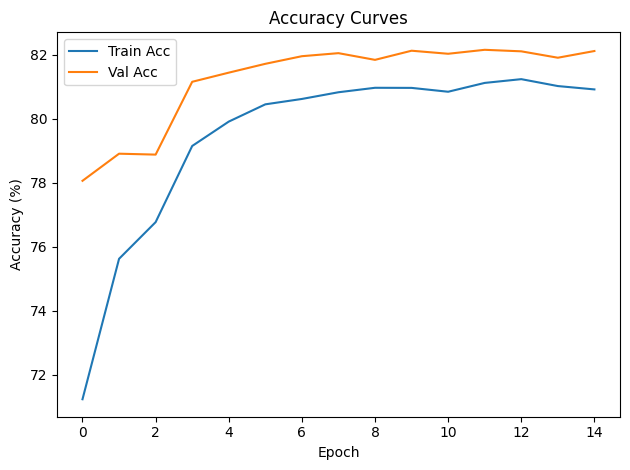


=== Training FNN-3 ===
Architecture: [512, 256], Dropout: 0.3
Training on cpu...
Epoch 1/15 | Val Loss: 0.5681, Val Acc: 79.03% | Time: 2.48s
Epoch 2/15 | Val Loss: 0.5306, Val Acc: 80.18% | Time: 2.48s
Epoch 3/15 | Val Loss: 0.5179, Val Acc: 80.88% | Time: 2.46s
Epoch 4/15 | Val Loss: 0.5211, Val Acc: 81.02% | Time: 2.43s
Epoch 5/15 | Val Loss: 0.5158, Val Acc: 80.65% | Time: 2.48s
Epoch 6/15 | Val Loss: 0.4687, Val Acc: 82.31% | Time: 2.47s
Epoch 7/15 | Val Loss: 0.4712, Val Acc: 82.69% | Time: 2.49s
Epoch 8/15 | Val Loss: 0.4870, Val Acc: 82.55% | Time: 2.51s
Epoch 9/15 | Val Loss: 0.4833, Val Acc: 82.25% | Time: 2.49s
Epoch 10/15 | Val Loss: 0.4367, Val Acc: 83.60% | Time: 2.41s
Epoch 11/15 | Val Loss: 0.4290, Val Acc: 84.31% | Time: 2.54s
Epoch 12/15 | Val Loss: 0.4265, Val Acc: 84.37% | Time: 2.55s
Epoch 13/15 | Val Loss: 0.4322, Val Acc: 83.80% | Time: 2.49s
Epoch 14/15 | Val Loss: 0.4324, Val Acc: 84.14% | Time: 2.44s
Epoch 15/15 | Val Loss: 0.4346, Val Acc: 84.08% | Time: 2.4

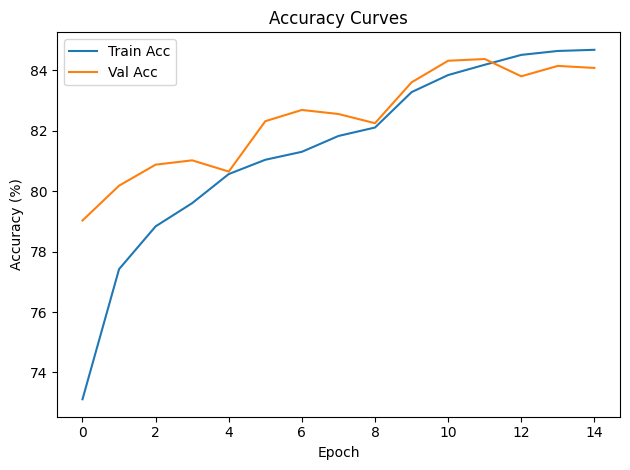


=== Training FNN-4 ===
Architecture: [512, 256, 128], Dropout: 0.4
Training on cpu...
Epoch 1/15 | Val Loss: 0.6200, Val Acc: 76.52% | Time: 2.12s
Epoch 2/15 | Val Loss: 0.5845, Val Acc: 78.21% | Time: 2.23s
Epoch 3/15 | Val Loss: 0.5571, Val Acc: 79.05% | Time: 2.33s
Epoch 4/15 | Val Loss: 0.5042, Val Acc: 80.92% | Time: 2.15s
Epoch 5/15 | Val Loss: 0.5024, Val Acc: 81.22% | Time: 2.17s
Epoch 6/15 | Val Loss: 0.4914, Val Acc: 81.49% | Time: 2.17s
Epoch 7/15 | Val Loss: 0.4924, Val Acc: 81.51% | Time: 2.15s
Epoch 8/15 | Val Loss: 0.4882, Val Acc: 81.45% | Time: 2.03s
Epoch 9/15 | Val Loss: 0.4889, Val Acc: 81.52% | Time: 2.04s
Epoch 10/15 | Val Loss: 0.4848, Val Acc: 81.84% | Time: 2.09s
Epoch 11/15 | Val Loss: 0.4864, Val Acc: 81.84% | Time: 2.01s
Epoch 12/15 | Val Loss: 0.4895, Val Acc: 81.59% | Time: 2.02s
Epoch 13/15 | Val Loss: 0.4884, Val Acc: 81.63% | Time: 2.06s
Early stopping!


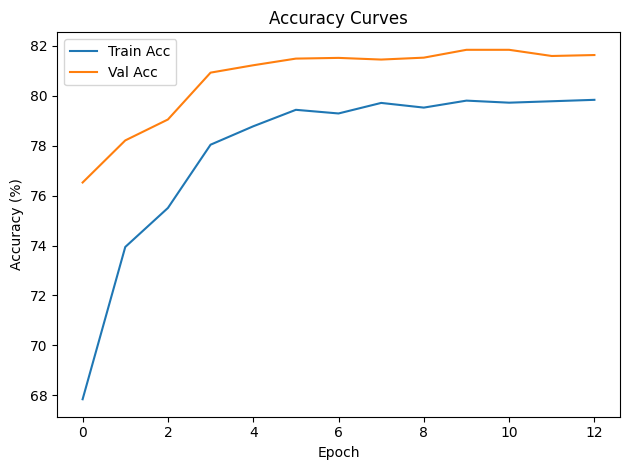


=== Training FNN-5 ===
Architecture: [1024, 512, 256], Dropout: 0.5
Training on cpu...
Epoch 1/15 | Val Loss: 0.6101, Val Acc: 77.25% | Time: 4.52s
Epoch 2/15 | Val Loss: 0.5685, Val Acc: 78.02% | Time: 4.39s
Epoch 3/15 | Val Loss: 0.5359, Val Acc: 79.82% | Time: 4.56s
Epoch 4/15 | Val Loss: 0.5242, Val Acc: 80.73% | Time: 4.43s
Epoch 5/15 | Val Loss: 0.5276, Val Acc: 80.10% | Time: 4.44s
Epoch 6/15 | Val Loss: 0.5044, Val Acc: 81.18% | Time: 4.61s
Epoch 7/15 | Val Loss: 0.4956, Val Acc: 81.23% | Time: 4.54s
Epoch 8/15 | Val Loss: 0.4883, Val Acc: 81.81% | Time: 4.43s
Epoch 9/15 | Val Loss: 0.4901, Val Acc: 81.59% | Time: 4.47s
Epoch 10/15 | Val Loss: 0.4728, Val Acc: 82.28% | Time: 4.43s
Epoch 11/15 | Val Loss: 0.4730, Val Acc: 82.53% | Time: 4.41s
Epoch 12/15 | Val Loss: 0.4800, Val Acc: 82.41% | Time: 4.48s
Epoch 13/15 | Val Loss: 0.4755, Val Acc: 82.50% | Time: 4.42s
Epoch 14/15 | Val Loss: 0.4574, Val Acc: 83.06% | Time: 4.41s
Epoch 15/15 | Val Loss: 0.4476, Val Acc: 83.22% | Tim

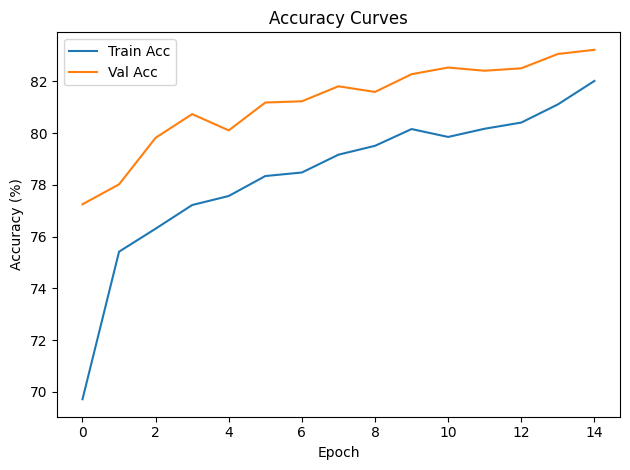


=== Model Comparison (Validation Accuracy) ===
Model      Validation Acc 
-------------------------
FNN-1      82.87%
FNN-2      82.15%
FNN-3      84.37%
FNN-4      81.84%
FNN-5      83.22%

=== Best Model (by validation accuracy) ===
Best model: FNN-3 with validation accuracy: 84.37%

=== Evaluating Best Model (FNN-3) on Test Set ===
Test Accuracy: 0.8423


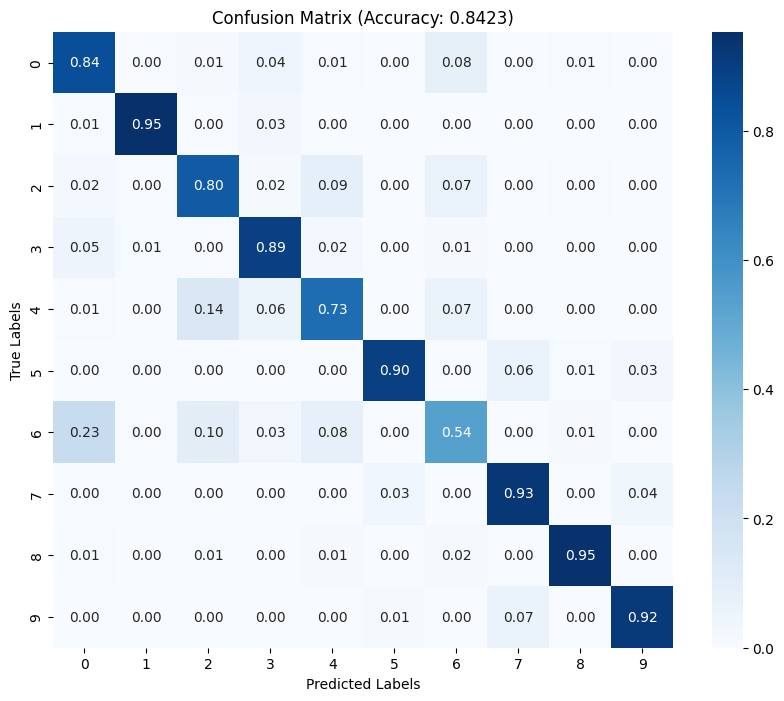

In [13]:
best_model_fnn, best_model_name_fnn, test_accuracy_fnn = run_experiments_fnn()

As we can see, the best model has shown a 84.23% accuracy on previously unseen test data, which is a good result. However, further improvements could be made, especially with more complex models like CNNs.

### Convolutional Neural Network

CNNs are well-suited for image classification tasks because they excel at capturing spatial hierarchies and patterns in images. Their convolutional layers can automatically detect local features like edges, textures, and shapes, which are essential for distinguishing between different image classes. This makes them more efficient and accurate for tasks like image recognition.

In [14]:
import torch.nn.functional as F

When training convolutional neural networks, **using CUDA is better** because CNNs require performing a large number of similar and repetitive mathematical operations, especially convolutions and matrix multiplications. This speedup is especially important for large datasets, complex models, and when experimenting with different architectures or hyperparameters. Therefore, using CUDA makes training convolutional networks significantly more efficient and practical.

In [15]:
myDeviceCnn = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {myDeviceCnn}")

Using device: cuda


**A simple CNN with 3 convolutional layers followed by 2 fully connected layers:**

#### Pros:
- Easy to understand and implement
- Fast training speed
- Good for simple image classification tasks
- Less prone to overfitting on small datasets

#### Cons:
- Limited capacity to learn complex features
- May underperform on challenging datasets
- Less accurate than deeper architectures

In [16]:
class BasicCNN(nn.Module):
    def __init__(self, num_classes=10, dropout_rate=0.3):
        super(BasicCNN, self).__init__()
        # First convolutional block
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.pool = nn.MaxPool2d(2, 2)
        
        # Second convolutional block
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        
        # Third convolutional block
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        
        # Fully connected layers
        self.fc1 = nn.Linear(128 * 4 * 4, 512)
        self.dropout = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(512, num_classes)
    
    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))  # 32x32 -> 16x16
        x = self.pool(F.relu(self.bn2(self.conv2(x))))  # 16x16 -> 8x8
        x = self.pool(F.relu(self.bn3(self.conv3(x))))  # 8x8 -> 4x4
        
        x = x.view(-1, 128 * 4 * 4)  # flatten
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

**A deeper CNN with multiple convolutional layers and more regularization:**

#### Pros:
- Better feature extraction capability
- Higher accuracy potential on complex tasks
- More robust to variations in the input
- Better hierarchical representation learning

#### Cons:
- Longer training time
- More parameters, requires more memory
- May overfit on small datasets
- Requires more regularization techniques

In [17]:
class DeepCNN(nn.Module):

    def __init__(self, num_classes=10, dropout_rate=0.5):
        super(DeepCNN, self).__init__()
        # First convolutional block
        self.conv1_1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.bn1_1 = nn.BatchNorm2d(32)
        self.conv1_2 = nn.Conv2d(32, 32, kernel_size=3, padding=1)
        self.bn1_2 = nn.BatchNorm2d(32)
        self.pool1 = nn.MaxPool2d(2, 2)
        
        # Second convolutional block
        self.conv2_1 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2_1 = nn.BatchNorm2d(64)
        self.conv2_2 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.bn2_2 = nn.BatchNorm2d(64)
        self.pool2 = nn.MaxPool2d(2, 2)
        
        # Third convolutional block
        self.conv3_1 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3_1 = nn.BatchNorm2d(128)
        self.conv3_2 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.bn3_2 = nn.BatchNorm2d(128)
        self.pool3 = nn.MaxPool2d(2, 2)
        
        # Fully connected layers
        self.fc1 = nn.Linear(128 * 4 * 4, 512)
        self.bn4 = nn.BatchNorm1d(512)
        self.dropout1 = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(512, 256)
        self.bn5 = nn.BatchNorm1d(256)
        self.dropout2 = nn.Dropout(dropout_rate)
        self.fc3 = nn.Linear(256, num_classes)
    
    def forward(self, x):
        # First block
        x = F.relu(self.bn1_1(self.conv1_1(x)))
        x = F.relu(self.bn1_2(self.conv1_2(x)))
        x = self.pool1(x)  # 32x32 -> 16x16
        
        # Second block
        x = F.relu(self.bn2_1(self.conv2_1(x)))
        x = F.relu(self.bn2_2(self.conv2_2(x)))
        x = self.pool2(x)  # 16x16 -> 8x8
        
        # Third block
        x = F.relu(self.bn3_1(self.conv3_1(x)))
        x = F.relu(self.bn3_2(self.conv3_2(x)))
        x = self.pool3(x)  # 8x8 -> 4x4
        
        # Fully connected layers
        x = x.view(-1, 128 * 4 * 4)
        x = F.relu(self.bn4(self.fc1(x)))
        x = self.dropout1(x)
        x = F.relu(self.bn5(self.fc2(x)))
        x = self.dropout2(x)
        x = self.fc3(x)
        
        return x

**CNN with residual connections:**

#### Pros:
- Mitigates vanishing gradient problem
- Can be trained much deeper
- Better gradient flow through the network
- Often achieves higher accuracy with fewer parameters

#### Cons:
- More complex implementation
- Slightly higher memory usage due to skip connections
- May require more careful initialization
- Higher computational overhead from more complex blocks

In [18]:
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(out_channels)
        
        # Shortcut connection
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride),
                nn.BatchNorm2d(out_channels)
            )
    
    def forward(self, x):
        residual = x
        
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(residual)
        out = F.relu(out)
        
        return out

class ResCNN(nn.Module):
    def __init__(self, num_classes=10, dropout_rate=0.5):
        super(ResCNN, self).__init__()
        # Input convolutional layer
        self.conv1 = nn.Conv2d(1, 64, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.pool = nn.MaxPool2d(2, 2)
        
        # Residual blocks
        self.res1 = ResidualBlock(64, 64)
        self.res2 = ResidualBlock(64, 128, stride=1)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.res3 = ResidualBlock(128, 256, stride=1)
        self.pool3 = nn.MaxPool2d(2, 2)
        
        # Fully connected layers
        self.fc1 = nn.Linear(256 * 4 * 4, 512)
        self.dropout1 = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(512, num_classes)
    
    def forward(self, x):
        # Input blocks
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.pool(x)  # 32x32 -> 16x16
        
        # Residual blocks
        x = self.res1(x)  # Output: 64 channels, 16x16
        x = self.pool2(x)  # 16x16 -> 8x8
        x = self.res2(x)  # Output: 128 channels, 8x8
        x = self.pool3(x)  # 8x8 -> 4x4
        x = self.res3(x)  # Output: 256 channels, 4x4
        
        # Fully connected layers
        x = x.view(-1, 256 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = self.fc2(x)
        
        return x

In [19]:
def run_experiments_cnn():

    num_classes = 10
    num_epochs = 15
    
    # Define CNN models
    cnn_models = {
        "BasicCNN": BasicCNN(num_classes=num_classes, dropout_rate=0.3),
        "DeepCNN": DeepCNN(num_classes=num_classes, dropout_rate=0.5),
        "ResCNN": ResCNN(num_classes=num_classes, dropout_rate=0.5)
    }
    
    # Define optimizers
    optimizers = {
        "Adam": optim.Adam,
        "SGD": optim.SGD,
        "RMSprop": optim.RMSprop
    }
    
    # Define schedulers
    schedulers = {
        "ReduceLROnPlateau": lambda opt: optim.lr_scheduler.ReduceLROnPlateau(opt, 'min', patience=2, factor=0.5),
        "StepLR": lambda opt: optim.lr_scheduler.StepLR(opt, step_size=3, gamma=0.1),
        "CosineAnnealingLR": lambda opt: optim.lr_scheduler.CosineAnnealingLR(opt, T_max=num_epochs)
    }
    
    weight_decay = 1e-4
    
    # Store results and models
    results = {}
    trained_models = {}
    
    # For each combination of model-optimizer-scheduler-decay
    for model_name, model in cnn_models.items():
        for opt_name, opt_class in optimizers.items():
            for sched_name, sched_creator in schedulers.items():
                # Create experiment name
                exp_name = f"{model_name}-{opt_name}-{sched_name}-WD{weight_decay}"
                print(f"\n=== Training {exp_name} ===")
                
                # Create new model instance for each experiment
                if model_name == "BasicCNN":
                    model = BasicCNN(num_classes=num_classes, dropout_rate=0.3)
                elif model_name == "DeepCNN":
                    model = DeepCNN(num_classes=num_classes, dropout_rate=0.5)
                else:  # ResCNN
                    model = ResCNN(num_classes=num_classes, dropout_rate=0.5)
                
                # Define criterion (loss function)
                criterion = nn.CrossEntropyLoss()
                
                # Create optimizer
                if opt_name == "Adam":
                    optimizer = opt_class(model.parameters(), lr=0.001, weight_decay=weight_decay)
                else:  # RMSprop
                    optimizer = opt_class(model.parameters(), lr=0.001, weight_decay=weight_decay)
                
                # Create scheduler
                scheduler = sched_creator(optimizer)
                
                # Train model
                trained_model, val_acc = train_model(
                    model=model,
                    train_loader=train_loader_cnn,
                    val_loader=val_loader_cnn,
                    criterion=criterion,
                    optimizer=optimizer,
                    scheduler=scheduler,
                    num_epochs=num_epochs,
                    device=myDeviceCnn
                )
                
                # Save results and model
                results[exp_name] = val_acc
                trained_models[exp_name] = trained_model
    
    # Find best model
    best_model_name = max(results, key=results.get)
    best_val_acc = results[best_model_name]
    best_model = trained_models[best_model_name]
    
    print(f"\n=== Best model (by validation accuracy) ===")
    print(f"Best model: {best_model_name} with validation accuracy: {best_val_acc:.2f}%")
    
    # Evaluate best model on test set
    print(f"\n=== Evaluating best model ({best_model_name}) on test set ===")
    test_acc = evaluate_model(best_model, test_loader_cnn, myDeviceCnn)
    
    return best_model, best_model_name, test_acc


=== Training BasicCNN-Adam-ReduceLROnPlateau-WD0.0001 ===
Training on cuda...
Epoch 1/15 | Val Loss: 0.4803, Val Acc: 81.09% | Time: 2.70s
Epoch 2/15 | Val Loss: 0.4517, Val Acc: 83.73% | Time: 2.35s
Epoch 3/15 | Val Loss: 0.3354, Val Acc: 87.90% | Time: 2.35s
Epoch 4/15 | Val Loss: 0.3008, Val Acc: 89.05% | Time: 2.35s
Epoch 5/15 | Val Loss: 0.3253, Val Acc: 88.39% | Time: 2.35s
Epoch 6/15 | Val Loss: 0.2871, Val Acc: 89.65% | Time: 2.36s
Epoch 7/15 | Val Loss: 0.2826, Val Acc: 90.02% | Time: 2.36s
Epoch 8/15 | Val Loss: 0.2901, Val Acc: 89.65% | Time: 2.33s
Epoch 9/15 | Val Loss: 0.3809, Val Acc: 87.72% | Time: 2.40s
Epoch 10/15 | Val Loss: 0.3202, Val Acc: 89.25% | Time: 2.35s
Early stopping!


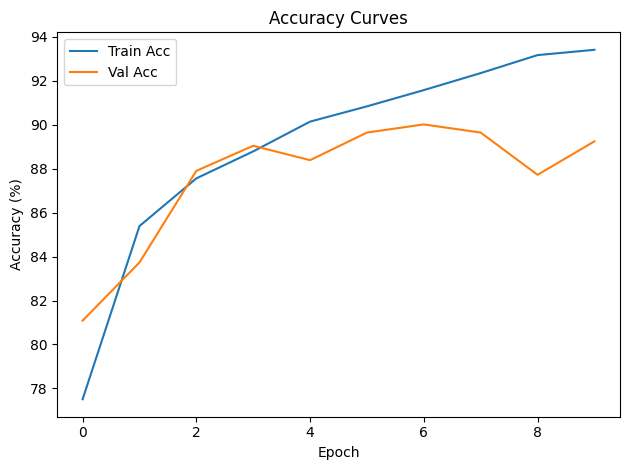


=== Training BasicCNN-Adam-StepLR-WD0.0001 ===
Training on cuda...
Epoch 1/15 | Val Loss: 0.4146, Val Acc: 84.69% | Time: 2.34s
Epoch 2/15 | Val Loss: 0.3640, Val Acc: 86.29% | Time: 2.34s
Epoch 3/15 | Val Loss: 0.3327, Val Acc: 87.49% | Time: 2.37s
Epoch 4/15 | Val Loss: 0.2797, Val Acc: 89.39% | Time: 2.36s
Epoch 5/15 | Val Loss: 0.2757, Val Acc: 89.90% | Time: 2.34s
Epoch 6/15 | Val Loss: 0.2744, Val Acc: 90.12% | Time: 2.38s
Epoch 7/15 | Val Loss: 0.2706, Val Acc: 90.06% | Time: 2.38s
Epoch 8/15 | Val Loss: 0.2707, Val Acc: 90.25% | Time: 2.33s
Epoch 9/15 | Val Loss: 0.2708, Val Acc: 90.24% | Time: 2.34s
Epoch 10/15 | Val Loss: 0.2702, Val Acc: 90.21% | Time: 2.41s
Epoch 11/15 | Val Loss: 0.2703, Val Acc: 90.21% | Time: 2.34s
Early stopping!


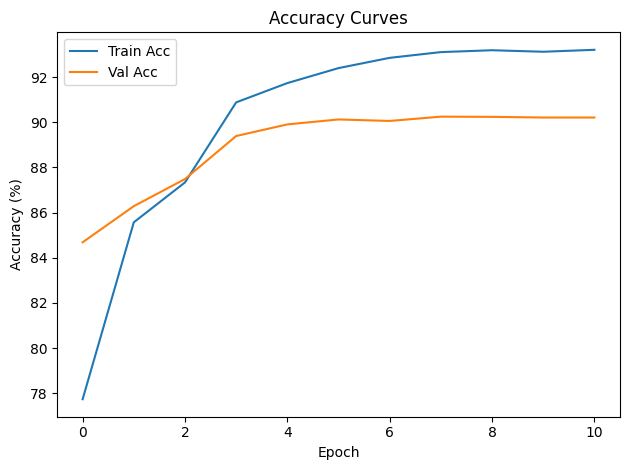


=== Training BasicCNN-Adam-CosineAnnealingLR-WD0.0001 ===
Training on cuda...
Epoch 1/15 | Val Loss: 0.4126, Val Acc: 84.70% | Time: 2.33s
Epoch 2/15 | Val Loss: 0.3630, Val Acc: 86.44% | Time: 2.35s
Epoch 3/15 | Val Loss: 0.3213, Val Acc: 88.46% | Time: 2.36s
Epoch 4/15 | Val Loss: 0.4018, Val Acc: 85.47% | Time: 2.43s
Epoch 5/15 | Val Loss: 0.2968, Val Acc: 89.14% | Time: 2.36s
Epoch 6/15 | Val Loss: 0.2766, Val Acc: 89.89% | Time: 2.38s
Epoch 7/15 | Val Loss: 0.2858, Val Acc: 89.55% | Time: 2.36s
Epoch 8/15 | Val Loss: 0.2853, Val Acc: 90.07% | Time: 2.36s
Epoch 9/15 | Val Loss: 0.2815, Val Acc: 90.16% | Time: 2.36s
Epoch 10/15 | Val Loss: 0.2957, Val Acc: 89.62% | Time: 2.36s
Epoch 11/15 | Val Loss: 0.3046, Val Acc: 90.56% | Time: 2.37s
Epoch 12/15 | Val Loss: 0.3049, Val Acc: 90.73% | Time: 2.36s
Epoch 13/15 | Val Loss: 0.3119, Val Acc: 90.73% | Time: 2.34s
Epoch 14/15 | Val Loss: 0.3154, Val Acc: 90.71% | Time: 2.34s
Epoch 15/15 | Val Loss: 0.3160, Val Acc: 90.76% | Time: 2.37s


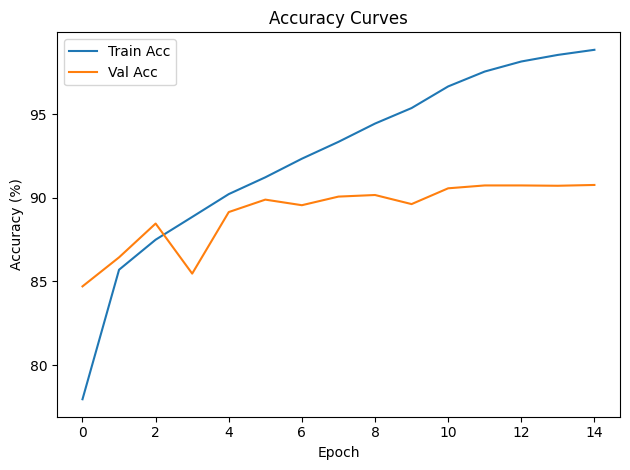


=== Training BasicCNN-SGD-ReduceLROnPlateau-WD0.0001 ===
Training on cuda...
Epoch 1/15 | Val Loss: 1.0946, Val Acc: 73.00% | Time: 2.26s
Epoch 2/15 | Val Loss: 0.8195, Val Acc: 75.15% | Time: 2.23s
Epoch 3/15 | Val Loss: 0.7120, Val Acc: 76.38% | Time: 2.24s
Epoch 4/15 | Val Loss: 0.6579, Val Acc: 77.34% | Time: 2.24s
Epoch 5/15 | Val Loss: 0.6152, Val Acc: 78.52% | Time: 2.24s
Epoch 6/15 | Val Loss: 0.5828, Val Acc: 79.42% | Time: 2.24s
Epoch 7/15 | Val Loss: 0.5616, Val Acc: 80.23% | Time: 2.27s
Epoch 8/15 | Val Loss: 0.5364, Val Acc: 81.12% | Time: 2.26s
Epoch 9/15 | Val Loss: 0.5193, Val Acc: 81.51% | Time: 2.24s
Epoch 10/15 | Val Loss: 0.5044, Val Acc: 82.22% | Time: 2.23s
Epoch 11/15 | Val Loss: 0.4870, Val Acc: 82.82% | Time: 2.23s
Epoch 12/15 | Val Loss: 0.4736, Val Acc: 83.30% | Time: 2.23s
Epoch 13/15 | Val Loss: 0.4633, Val Acc: 83.59% | Time: 2.22s
Epoch 14/15 | Val Loss: 0.4554, Val Acc: 83.71% | Time: 2.24s
Epoch 15/15 | Val Loss: 0.4410, Val Acc: 84.41% | Time: 2.22s


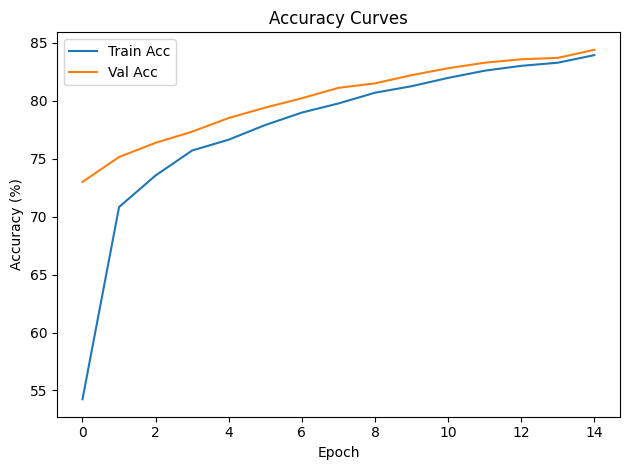


=== Training BasicCNN-SGD-StepLR-WD0.0001 ===
Training on cuda...
Epoch 1/15 | Val Loss: 1.0835, Val Acc: 71.43% | Time: 2.27s
Epoch 2/15 | Val Loss: 0.8201, Val Acc: 75.06% | Time: 2.22s
Epoch 3/15 | Val Loss: 0.7122, Val Acc: 76.53% | Time: 2.23s
Epoch 4/15 | Val Loss: 0.7002, Val Acc: 76.55% | Time: 2.27s
Epoch 5/15 | Val Loss: 0.6961, Val Acc: 76.58% | Time: 2.24s
Epoch 6/15 | Val Loss: 0.6948, Val Acc: 76.71% | Time: 2.27s
Epoch 7/15 | Val Loss: 0.6877, Val Acc: 76.70% | Time: 2.24s
Epoch 8/15 | Val Loss: 0.6919, Val Acc: 76.71% | Time: 2.26s
Epoch 9/15 | Val Loss: 0.6889, Val Acc: 76.76% | Time: 2.23s
Epoch 10/15 | Val Loss: 0.6880, Val Acc: 76.70% | Time: 2.23s
Epoch 11/15 | Val Loss: 0.6872, Val Acc: 76.70% | Time: 2.24s
Epoch 12/15 | Val Loss: 0.6858, Val Acc: 76.75% | Time: 2.25s
Early stopping!


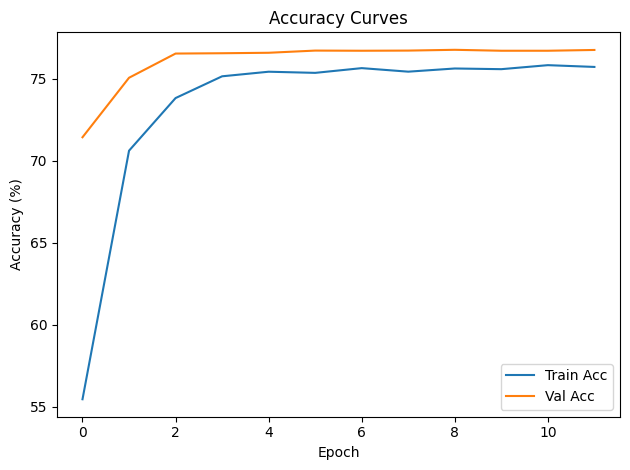


=== Training BasicCNN-SGD-CosineAnnealingLR-WD0.0001 ===
Training on cuda...
Epoch 1/15 | Val Loss: 1.0630, Val Acc: 72.06% | Time: 2.22s
Epoch 2/15 | Val Loss: 0.8148, Val Acc: 74.09% | Time: 2.23s
Epoch 3/15 | Val Loss: 0.7260, Val Acc: 75.92% | Time: 2.25s
Epoch 4/15 | Val Loss: 0.6671, Val Acc: 76.73% | Time: 2.23s
Epoch 5/15 | Val Loss: 0.6347, Val Acc: 77.63% | Time: 2.24s
Epoch 6/15 | Val Loss: 0.6020, Val Acc: 78.61% | Time: 2.22s
Epoch 7/15 | Val Loss: 0.5858, Val Acc: 79.05% | Time: 2.23s
Epoch 8/15 | Val Loss: 0.5695, Val Acc: 79.50% | Time: 2.23s
Epoch 9/15 | Val Loss: 0.5564, Val Acc: 80.08% | Time: 2.22s
Epoch 10/15 | Val Loss: 0.5489, Val Acc: 80.26% | Time: 2.23s
Epoch 11/15 | Val Loss: 0.5435, Val Acc: 80.55% | Time: 2.22s
Epoch 12/15 | Val Loss: 0.5394, Val Acc: 80.56% | Time: 2.25s
Epoch 13/15 | Val Loss: 0.5363, Val Acc: 80.75% | Time: 2.24s
Epoch 14/15 | Val Loss: 0.5373, Val Acc: 80.61% | Time: 2.22s
Epoch 15/15 | Val Loss: 0.5366, Val Acc: 80.65% | Time: 2.22s


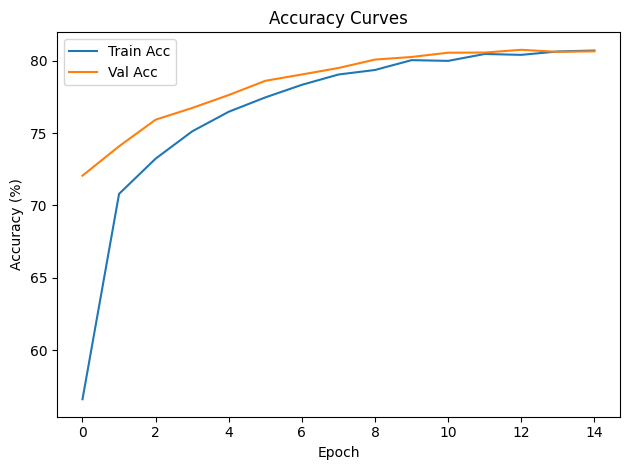


=== Training BasicCNN-RMSprop-ReduceLROnPlateau-WD0.0001 ===
Training on cuda...
Epoch 1/15 | Val Loss: 0.7324, Val Acc: 74.17% | Time: 2.30s
Epoch 2/15 | Val Loss: 0.8954, Val Acc: 70.90% | Time: 2.28s
Epoch 3/15 | Val Loss: 0.3657, Val Acc: 85.54% | Time: 2.33s
Epoch 4/15 | Val Loss: 0.4837, Val Acc: 81.86% | Time: 2.30s
Epoch 5/15 | Val Loss: 0.4729, Val Acc: 84.27% | Time: 2.35s
Epoch 6/15 | Val Loss: 0.6176, Val Acc: 80.80% | Time: 2.31s
Early stopping!


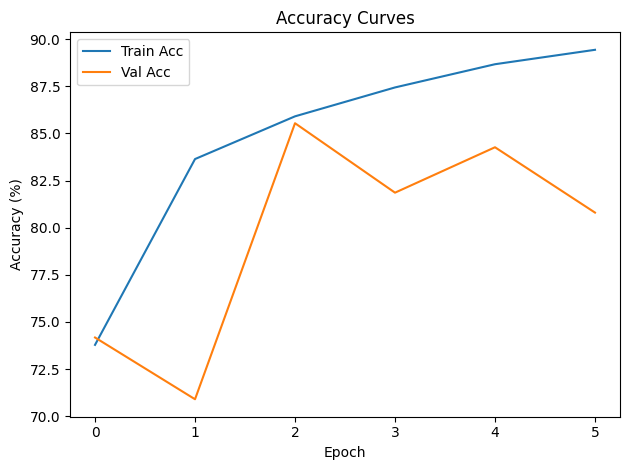


=== Training BasicCNN-RMSprop-StepLR-WD0.0001 ===
Training on cuda...
Epoch 1/15 | Val Loss: 0.6073, Val Acc: 75.91% | Time: 2.34s
Epoch 2/15 | Val Loss: 0.5593, Val Acc: 81.11% | Time: 2.35s
Epoch 3/15 | Val Loss: 0.4750, Val Acc: 82.39% | Time: 2.33s
Epoch 4/15 | Val Loss: 0.2993, Val Acc: 88.97% | Time: 2.32s
Epoch 5/15 | Val Loss: 0.2950, Val Acc: 89.03% | Time: 2.49s
Epoch 6/15 | Val Loss: 0.2882, Val Acc: 89.47% | Time: 2.49s
Epoch 7/15 | Val Loss: 0.2841, Val Acc: 89.64% | Time: 2.33s
Epoch 8/15 | Val Loss: 0.2836, Val Acc: 89.63% | Time: 2.32s
Epoch 9/15 | Val Loss: 0.2837, Val Acc: 89.52% | Time: 2.33s
Epoch 10/15 | Val Loss: 0.2838, Val Acc: 89.51% | Time: 2.34s
Early stopping!


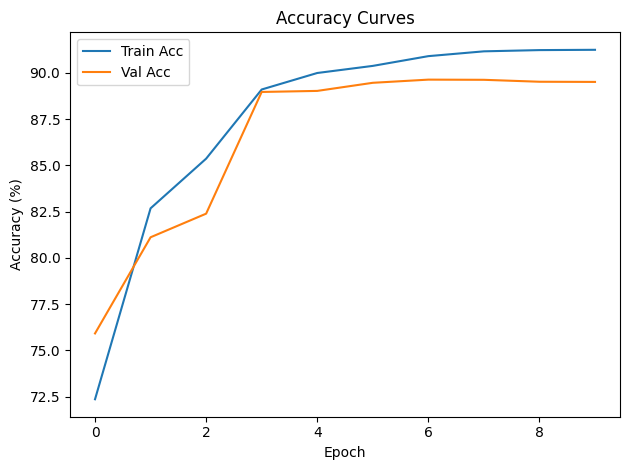


=== Training BasicCNN-RMSprop-CosineAnnealingLR-WD0.0001 ===
Training on cuda...
Epoch 1/15 | Val Loss: 1.0050, Val Acc: 67.74% | Time: 2.67s
Epoch 2/15 | Val Loss: 0.6079, Val Acc: 77.10% | Time: 2.33s
Epoch 3/15 | Val Loss: 0.3611, Val Acc: 86.62% | Time: 2.36s
Epoch 4/15 | Val Loss: 0.3841, Val Acc: 86.81% | Time: 2.33s
Epoch 5/15 | Val Loss: 0.3268, Val Acc: 88.10% | Time: 2.34s
Epoch 6/15 | Val Loss: 0.3573, Val Acc: 86.86% | Time: 2.31s
Epoch 7/15 | Val Loss: 0.4072, Val Acc: 86.64% | Time: 2.32s
Epoch 8/15 | Val Loss: 0.3227, Val Acc: 88.58% | Time: 2.32s
Epoch 9/15 | Val Loss: 0.3784, Val Acc: 86.96% | Time: 2.33s
Epoch 10/15 | Val Loss: 0.2858, Val Acc: 89.95% | Time: 2.32s
Epoch 11/15 | Val Loss: 0.2783, Val Acc: 90.26% | Time: 2.33s
Epoch 12/15 | Val Loss: 0.2952, Val Acc: 90.24% | Time: 2.34s
Epoch 13/15 | Val Loss: 0.2944, Val Acc: 90.43% | Time: 2.39s
Epoch 14/15 | Val Loss: 0.2865, Val Acc: 90.42% | Time: 2.33s
Epoch 15/15 | Val Loss: 0.2912, Val Acc: 90.41% | Time: 2.3

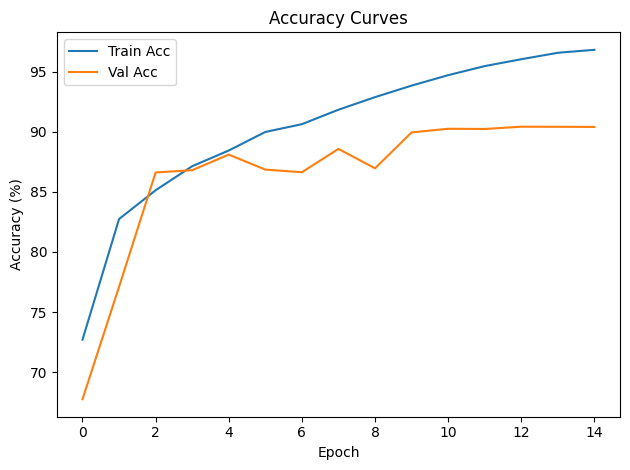


=== Training DeepCNN-Adam-ReduceLROnPlateau-WD0.0001 ===
Training on cuda...
Epoch 1/15 | Val Loss: 0.4168, Val Acc: 84.88% | Time: 3.79s
Epoch 2/15 | Val Loss: 0.3420, Val Acc: 86.93% | Time: 3.71s
Epoch 3/15 | Val Loss: 0.3210, Val Acc: 87.90% | Time: 3.71s
Epoch 4/15 | Val Loss: 0.3053, Val Acc: 88.75% | Time: 3.69s
Epoch 5/15 | Val Loss: 0.2785, Val Acc: 89.74% | Time: 3.69s
Epoch 6/15 | Val Loss: 0.2626, Val Acc: 90.36% | Time: 3.70s
Epoch 7/15 | Val Loss: 0.2606, Val Acc: 90.49% | Time: 3.74s
Epoch 8/15 | Val Loss: 0.2972, Val Acc: 89.72% | Time: 3.73s
Epoch 9/15 | Val Loss: 0.2582, Val Acc: 90.84% | Time: 3.73s
Epoch 10/15 | Val Loss: 0.2618, Val Acc: 91.08% | Time: 3.74s
Epoch 11/15 | Val Loss: 0.2801, Val Acc: 90.56% | Time: 3.74s
Epoch 12/15 | Val Loss: 0.2736, Val Acc: 90.83% | Time: 3.95s
Epoch 13/15 | Val Loss: 0.2912, Val Acc: 91.54% | Time: 3.74s
Epoch 14/15 | Val Loss: 0.3211, Val Acc: 90.90% | Time: 3.76s
Epoch 15/15 | Val Loss: 0.3213, Val Acc: 91.55% | Time: 3.79s


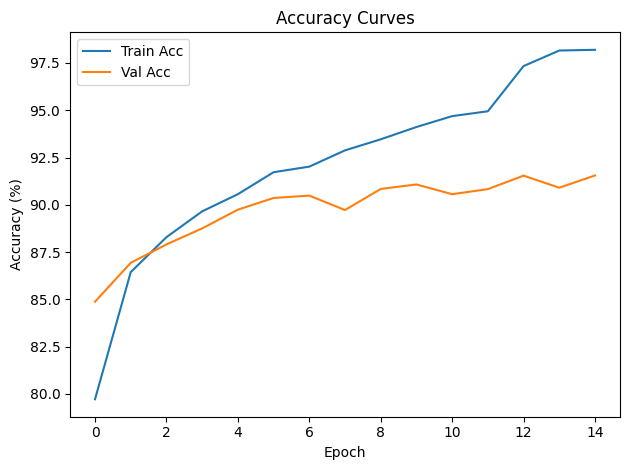


=== Training DeepCNN-Adam-StepLR-WD0.0001 ===
Training on cuda...
Epoch 1/15 | Val Loss: 0.4754, Val Acc: 82.42% | Time: 3.76s
Epoch 2/15 | Val Loss: 0.3154, Val Acc: 88.41% | Time: 3.91s
Epoch 3/15 | Val Loss: 0.2859, Val Acc: 89.48% | Time: 4.05s
Epoch 4/15 | Val Loss: 0.2432, Val Acc: 91.07% | Time: 3.86s
Epoch 5/15 | Val Loss: 0.2390, Val Acc: 91.22% | Time: 3.72s
Epoch 6/15 | Val Loss: 0.2433, Val Acc: 91.10% | Time: 3.70s
Epoch 7/15 | Val Loss: 0.2382, Val Acc: 91.58% | Time: 3.75s
Epoch 8/15 | Val Loss: 0.2388, Val Acc: 91.47% | Time: 3.73s
Epoch 9/15 | Val Loss: 0.2409, Val Acc: 91.43% | Time: 3.79s
Epoch 10/15 | Val Loss: 0.2386, Val Acc: 91.51% | Time: 3.73s
Early stopping!


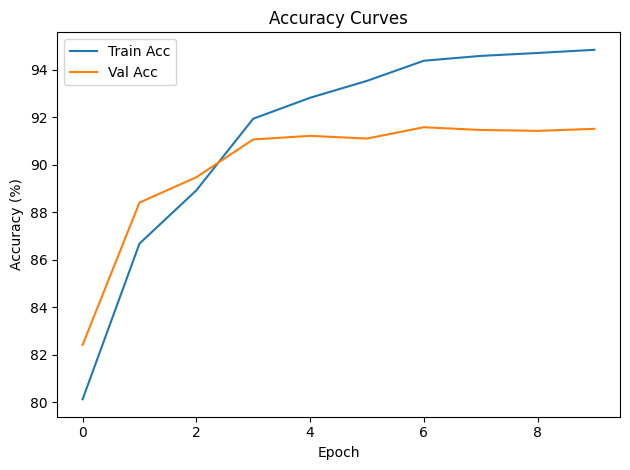


=== Training DeepCNN-Adam-CosineAnnealingLR-WD0.0001 ===
Training on cuda...
Epoch 1/15 | Val Loss: 0.4140, Val Acc: 84.59% | Time: 3.76s
Epoch 2/15 | Val Loss: 0.3330, Val Acc: 87.67% | Time: 4.07s
Epoch 3/15 | Val Loss: 0.3008, Val Acc: 88.85% | Time: 4.09s
Epoch 4/15 | Val Loss: 0.2754, Val Acc: 89.76% | Time: 3.90s
Epoch 5/15 | Val Loss: 0.2576, Val Acc: 90.63% | Time: 3.85s
Epoch 6/15 | Val Loss: 0.2629, Val Acc: 90.71% | Time: 3.89s
Epoch 7/15 | Val Loss: 0.2683, Val Acc: 90.53% | Time: 3.82s
Epoch 8/15 | Val Loss: 0.2597, Val Acc: 90.80% | Time: 3.73s
Epoch 9/15 | Val Loss: 0.2624, Val Acc: 91.35% | Time: 3.75s
Epoch 10/15 | Val Loss: 0.3152, Val Acc: 90.71% | Time: 3.73s
Epoch 11/15 | Val Loss: 0.3059, Val Acc: 91.54% | Time: 3.78s
Epoch 12/15 | Val Loss: 0.3175, Val Acc: 91.56% | Time: 3.76s
Epoch 13/15 | Val Loss: 0.3151, Val Acc: 91.83% | Time: 3.76s
Epoch 14/15 | Val Loss: 0.3238, Val Acc: 92.04% | Time: 3.76s
Epoch 15/15 | Val Loss: 0.3180, Val Acc: 92.11% | Time: 3.72s


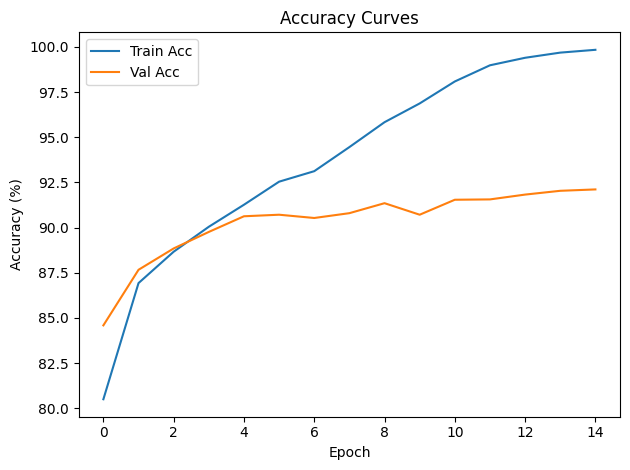


=== Training DeepCNN-SGD-ReduceLROnPlateau-WD0.0001 ===
Training on cuda...
Epoch 1/15 | Val Loss: 1.0886, Val Acc: 73.82% | Time: 3.76s
Epoch 2/15 | Val Loss: 0.8077, Val Acc: 76.90% | Time: 3.92s
Epoch 3/15 | Val Loss: 0.6805, Val Acc: 78.69% | Time: 3.95s
Epoch 4/15 | Val Loss: 0.6134, Val Acc: 80.19% | Time: 3.96s
Epoch 5/15 | Val Loss: 0.5558, Val Acc: 81.53% | Time: 3.86s
Epoch 6/15 | Val Loss: 0.5158, Val Acc: 82.57% | Time: 3.87s
Epoch 7/15 | Val Loss: 0.4804, Val Acc: 83.64% | Time: 3.81s
Epoch 8/15 | Val Loss: 0.4595, Val Acc: 84.21% | Time: 3.66s
Epoch 9/15 | Val Loss: 0.4333, Val Acc: 85.03% | Time: 3.75s
Epoch 10/15 | Val Loss: 0.4151, Val Acc: 85.44% | Time: 3.67s
Epoch 11/15 | Val Loss: 0.4040, Val Acc: 85.79% | Time: 3.72s
Epoch 12/15 | Val Loss: 0.3971, Val Acc: 86.33% | Time: 3.81s
Epoch 13/15 | Val Loss: 0.3869, Val Acc: 86.38% | Time: 3.64s
Epoch 14/15 | Val Loss: 0.3726, Val Acc: 86.81% | Time: 3.62s
Epoch 15/15 | Val Loss: 0.3602, Val Acc: 87.33% | Time: 3.61s


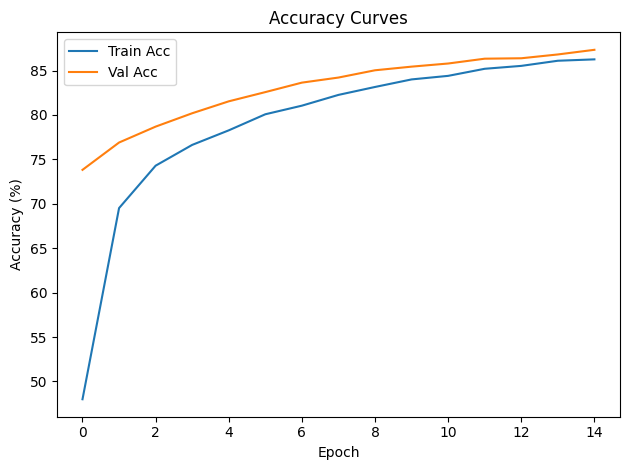


=== Training DeepCNN-SGD-StepLR-WD0.0001 ===
Training on cuda...
Epoch 1/15 | Val Loss: 1.0725, Val Acc: 73.48% | Time: 3.92s
Epoch 2/15 | Val Loss: 0.8059, Val Acc: 76.30% | Time: 3.91s
Epoch 3/15 | Val Loss: 0.6788, Val Acc: 77.87% | Time: 3.64s
Epoch 4/15 | Val Loss: 0.6669, Val Acc: 77.90% | Time: 3.59s
Epoch 5/15 | Val Loss: 0.6637, Val Acc: 78.16% | Time: 3.61s
Epoch 6/15 | Val Loss: 0.6521, Val Acc: 78.48% | Time: 3.58s
Epoch 7/15 | Val Loss: 0.6517, Val Acc: 78.35% | Time: 3.58s
Epoch 8/15 | Val Loss: 0.6549, Val Acc: 78.36% | Time: 3.59s
Epoch 9/15 | Val Loss: 0.6526, Val Acc: 78.29% | Time: 3.59s
Early stopping!


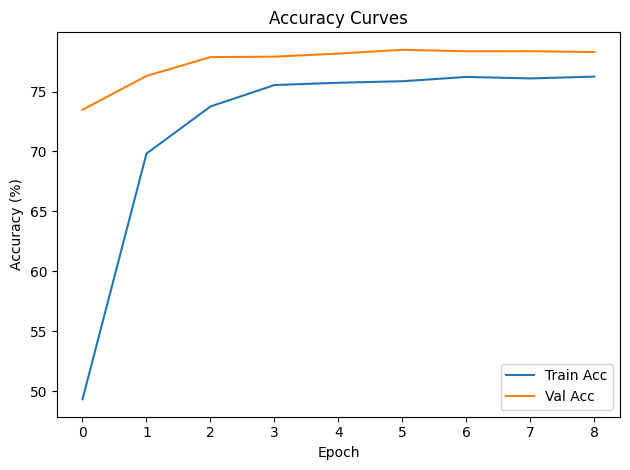


=== Training DeepCNN-SGD-CosineAnnealingLR-WD0.0001 ===
Training on cuda...
Epoch 1/15 | Val Loss: 1.0730, Val Acc: 73.77% | Time: 3.62s
Epoch 2/15 | Val Loss: 0.7950, Val Acc: 76.35% | Time: 3.57s
Epoch 3/15 | Val Loss: 0.6800, Val Acc: 78.12% | Time: 3.59s
Epoch 4/15 | Val Loss: 0.6178, Val Acc: 79.20% | Time: 3.59s
Epoch 5/15 | Val Loss: 0.5671, Val Acc: 80.75% | Time: 3.64s
Epoch 6/15 | Val Loss: 0.5396, Val Acc: 81.57% | Time: 3.61s
Epoch 7/15 | Val Loss: 0.5099, Val Acc: 82.42% | Time: 3.60s
Epoch 8/15 | Val Loss: 0.4916, Val Acc: 82.98% | Time: 3.59s
Epoch 9/15 | Val Loss: 0.4810, Val Acc: 83.44% | Time: 3.66s
Epoch 10/15 | Val Loss: 0.4693, Val Acc: 83.93% | Time: 3.56s
Epoch 11/15 | Val Loss: 0.4655, Val Acc: 84.20% | Time: 3.63s
Epoch 12/15 | Val Loss: 0.4616, Val Acc: 84.00% | Time: 3.58s
Epoch 13/15 | Val Loss: 0.4536, Val Acc: 84.25% | Time: 3.64s
Epoch 14/15 | Val Loss: 0.4549, Val Acc: 84.26% | Time: 3.62s
Epoch 15/15 | Val Loss: 0.4548, Val Acc: 84.45% | Time: 3.61s


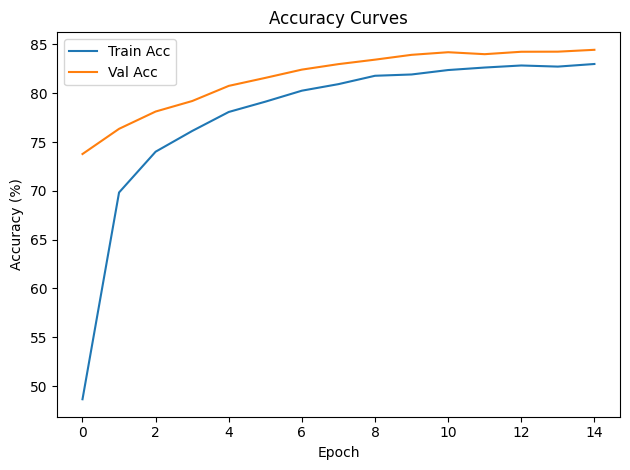


=== Training DeepCNN-RMSprop-ReduceLROnPlateau-WD0.0001 ===
Training on cuda...
Epoch 1/15 | Val Loss: 0.3894, Val Acc: 85.28% | Time: 3.77s
Epoch 2/15 | Val Loss: 0.3976, Val Acc: 85.04% | Time: 3.71s
Epoch 3/15 | Val Loss: 0.3436, Val Acc: 87.24% | Time: 3.71s
Epoch 4/15 | Val Loss: 0.3276, Val Acc: 88.28% | Time: 3.69s
Epoch 5/15 | Val Loss: 0.3814, Val Acc: 87.15% | Time: 3.68s
Epoch 6/15 | Val Loss: 0.2731, Val Acc: 89.94% | Time: 3.70s
Epoch 7/15 | Val Loss: 0.4368, Val Acc: 85.37% | Time: 3.67s
Epoch 8/15 | Val Loss: 0.3713, Val Acc: 87.81% | Time: 3.70s
Epoch 9/15 | Val Loss: 0.3362, Val Acc: 89.18% | Time: 3.71s
Early stopping!


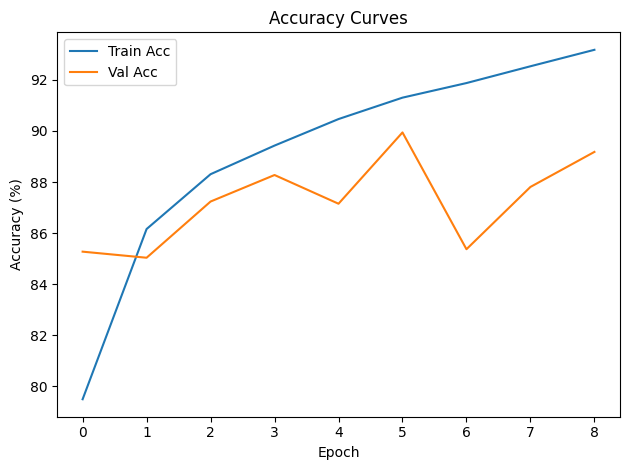


=== Training DeepCNN-RMSprop-StepLR-WD0.0001 ===
Training on cuda...
Epoch 1/15 | Val Loss: 0.4519, Val Acc: 82.80% | Time: 3.96s
Epoch 2/15 | Val Loss: 0.3215, Val Acc: 88.47% | Time: 3.85s
Epoch 3/15 | Val Loss: 0.4113, Val Acc: 83.20% | Time: 3.69s
Epoch 4/15 | Val Loss: 0.2415, Val Acc: 91.22% | Time: 3.74s
Epoch 5/15 | Val Loss: 0.2423, Val Acc: 91.15% | Time: 3.70s
Epoch 6/15 | Val Loss: 0.2315, Val Acc: 91.73% | Time: 3.73s
Epoch 7/15 | Val Loss: 0.2296, Val Acc: 91.77% | Time: 3.72s
Epoch 8/15 | Val Loss: 0.2287, Val Acc: 91.73% | Time: 3.71s
Epoch 9/15 | Val Loss: 0.2301, Val Acc: 91.76% | Time: 3.68s
Epoch 10/15 | Val Loss: 0.2280, Val Acc: 91.70% | Time: 3.70s
Early stopping!


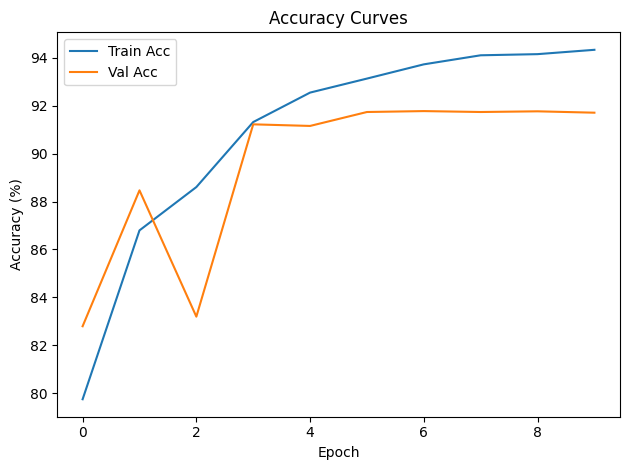


=== Training DeepCNN-RMSprop-CosineAnnealingLR-WD0.0001 ===
Training on cuda...
Epoch 1/15 | Val Loss: 1.0548, Val Acc: 69.82% | Time: 3.72s
Epoch 2/15 | Val Loss: 0.4929, Val Acc: 78.58% | Time: 3.68s
Epoch 3/15 | Val Loss: 0.3689, Val Acc: 87.10% | Time: 3.72s
Epoch 4/15 | Val Loss: 0.3941, Val Acc: 85.58% | Time: 3.73s
Epoch 5/15 | Val Loss: 0.2882, Val Acc: 89.79% | Time: 3.74s
Epoch 6/15 | Val Loss: 0.2752, Val Acc: 89.80% | Time: 3.72s
Epoch 7/15 | Val Loss: 0.4746, Val Acc: 85.41% | Time: 3.79s
Epoch 8/15 | Val Loss: 0.2451, Val Acc: 91.24% | Time: 3.89s
Epoch 9/15 | Val Loss: 0.6108, Val Acc: 84.67% | Time: 3.71s
Epoch 10/15 | Val Loss: 0.3195, Val Acc: 90.77% | Time: 3.79s
Epoch 11/15 | Val Loss: 0.2829, Val Acc: 91.74% | Time: 3.86s
Epoch 12/15 | Val Loss: 0.3057, Val Acc: 92.16% | Time: 3.83s
Epoch 13/15 | Val Loss: 0.3144, Val Acc: 92.15% | Time: 3.86s
Epoch 14/15 | Val Loss: 0.3178, Val Acc: 92.24% | Time: 3.83s
Epoch 15/15 | Val Loss: 0.3300, Val Acc: 92.14% | Time: 4.26

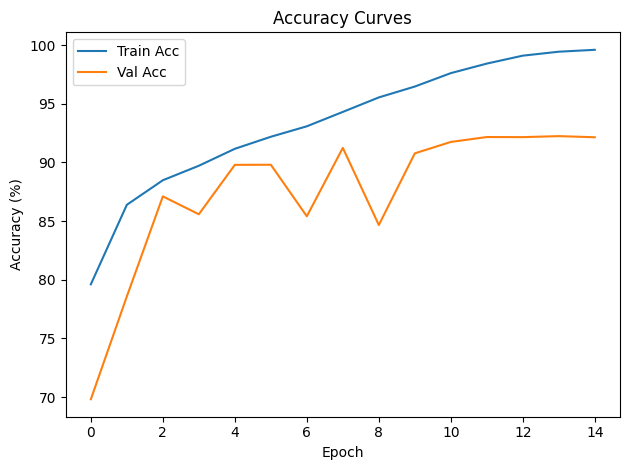


=== Training ResCNN-Adam-ReduceLROnPlateau-WD0.0001 ===
Training on cuda...
Epoch 1/15 | Val Loss: 0.4024, Val Acc: 84.76% | Time: 4.67s
Epoch 2/15 | Val Loss: 0.3404, Val Acc: 87.31% | Time: 4.51s
Epoch 3/15 | Val Loss: 0.3681, Val Acc: 86.87% | Time: 4.45s
Epoch 4/15 | Val Loss: 0.3173, Val Acc: 88.36% | Time: 4.58s
Epoch 5/15 | Val Loss: 0.3053, Val Acc: 89.53% | Time: 4.75s
Epoch 6/15 | Val Loss: 0.3247, Val Acc: 88.07% | Time: 4.71s
Epoch 7/15 | Val Loss: 0.2848, Val Acc: 89.43% | Time: 4.48s
Epoch 8/15 | Val Loss: 0.2699, Val Acc: 90.58% | Time: 4.47s
Epoch 9/15 | Val Loss: 0.3175, Val Acc: 89.23% | Time: 4.62s
Epoch 10/15 | Val Loss: 0.2791, Val Acc: 90.23% | Time: 4.52s
Epoch 11/15 | Val Loss: 0.3237, Val Acc: 89.73% | Time: 4.47s
Early stopping!


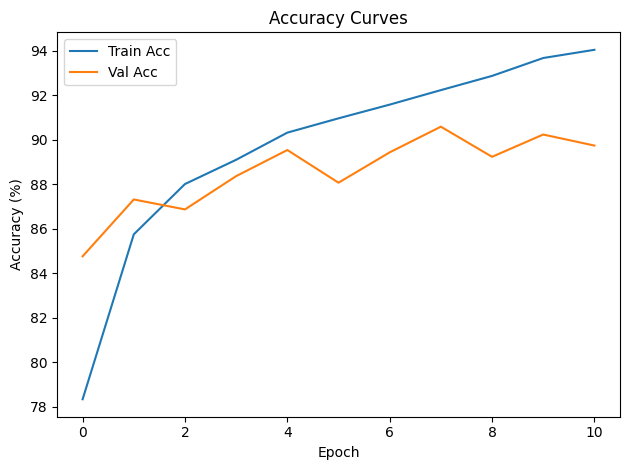


=== Training ResCNN-Adam-StepLR-WD0.0001 ===
Training on cuda...
Epoch 1/15 | Val Loss: 0.3846, Val Acc: 85.67% | Time: 4.51s
Epoch 2/15 | Val Loss: 0.3338, Val Acc: 87.69% | Time: 4.58s
Epoch 3/15 | Val Loss: 0.3475, Val Acc: 87.14% | Time: 4.50s
Epoch 4/15 | Val Loss: 0.2627, Val Acc: 90.54% | Time: 4.46s
Epoch 5/15 | Val Loss: 0.2638, Val Acc: 90.67% | Time: 4.55s
Epoch 6/15 | Val Loss: 0.2541, Val Acc: 90.81% | Time: 4.73s
Epoch 7/15 | Val Loss: 0.2551, Val Acc: 91.04% | Time: 4.70s
Epoch 8/15 | Val Loss: 0.2561, Val Acc: 90.97% | Time: 4.68s
Epoch 9/15 | Val Loss: 0.2577, Val Acc: 90.96% | Time: 4.47s
Epoch 10/15 | Val Loss: 0.2589, Val Acc: 90.98% | Time: 4.54s
Early stopping!


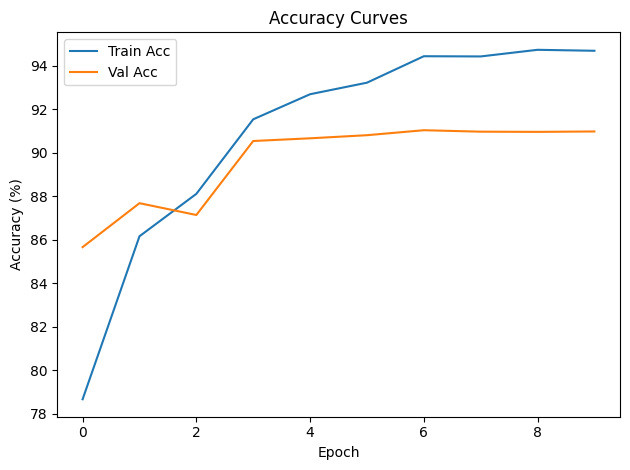


=== Training ResCNN-Adam-CosineAnnealingLR-WD0.0001 ===
Training on cuda...
Epoch 1/15 | Val Loss: 0.4395, Val Acc: 83.89% | Time: 4.54s
Epoch 2/15 | Val Loss: 0.3632, Val Acc: 86.26% | Time: 4.81s
Epoch 3/15 | Val Loss: 0.3678, Val Acc: 86.85% | Time: 5.27s
Epoch 4/15 | Val Loss: 0.3473, Val Acc: 87.92% | Time: 5.13s
Epoch 5/15 | Val Loss: 0.2864, Val Acc: 89.53% | Time: 4.50s
Epoch 6/15 | Val Loss: 0.2758, Val Acc: 90.19% | Time: 4.42s
Epoch 7/15 | Val Loss: 0.3090, Val Acc: 89.61% | Time: 4.43s
Epoch 8/15 | Val Loss: 0.2748, Val Acc: 90.32% | Time: 4.44s
Epoch 9/15 | Val Loss: 0.2972, Val Acc: 90.67% | Time: 4.42s
Epoch 10/15 | Val Loss: 0.3081, Val Acc: 90.91% | Time: 4.49s
Epoch 11/15 | Val Loss: 0.3735, Val Acc: 90.35% | Time: 4.45s
Epoch 12/15 | Val Loss: 0.4274, Val Acc: 90.62% | Time: 4.42s
Epoch 13/15 | Val Loss: 0.4221, Val Acc: 91.33% | Time: 4.43s
Epoch 14/15 | Val Loss: 0.4601, Val Acc: 91.32% | Time: 4.41s
Epoch 15/15 | Val Loss: 0.4633, Val Acc: 91.34% | Time: 4.46s


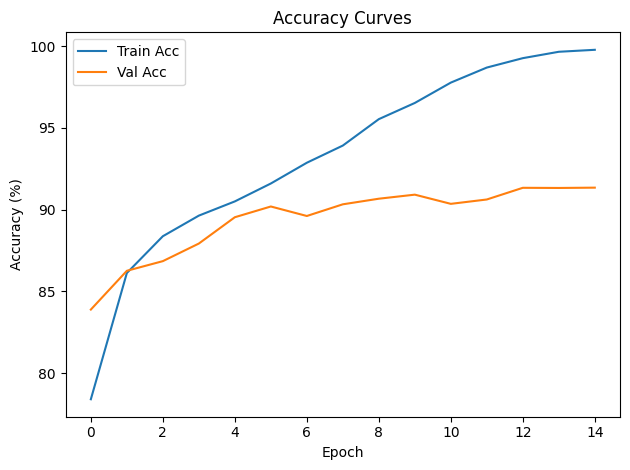


=== Training ResCNN-SGD-ReduceLROnPlateau-WD0.0001 ===
Training on cuda...
Epoch 1/15 | Val Loss: 0.7656, Val Acc: 75.53% | Time: 4.13s
Epoch 2/15 | Val Loss: 0.6142, Val Acc: 78.06% | Time: 4.47s
Epoch 3/15 | Val Loss: 0.5402, Val Acc: 80.33% | Time: 4.28s
Epoch 4/15 | Val Loss: 0.4977, Val Acc: 81.68% | Time: 4.12s
Epoch 5/15 | Val Loss: 0.4597, Val Acc: 83.35% | Time: 4.12s
Epoch 6/15 | Val Loss: 0.4333, Val Acc: 84.10% | Time: 4.17s
Epoch 7/15 | Val Loss: 0.4132, Val Acc: 84.68% | Time: 4.18s
Epoch 8/15 | Val Loss: 0.3960, Val Acc: 85.57% | Time: 4.25s
Epoch 9/15 | Val Loss: 0.3906, Val Acc: 85.83% | Time: 4.52s
Epoch 10/15 | Val Loss: 0.3822, Val Acc: 85.94% | Time: 4.39s
Epoch 11/15 | Val Loss: 0.3895, Val Acc: 85.64% | Time: 4.25s
Epoch 12/15 | Val Loss: 0.3717, Val Acc: 86.40% | Time: 4.27s
Epoch 13/15 | Val Loss: 0.3482, Val Acc: 86.93% | Time: 4.23s
Epoch 14/15 | Val Loss: 0.3377, Val Acc: 87.29% | Time: 4.39s
Epoch 15/15 | Val Loss: 0.3334, Val Acc: 87.67% | Time: 4.32s


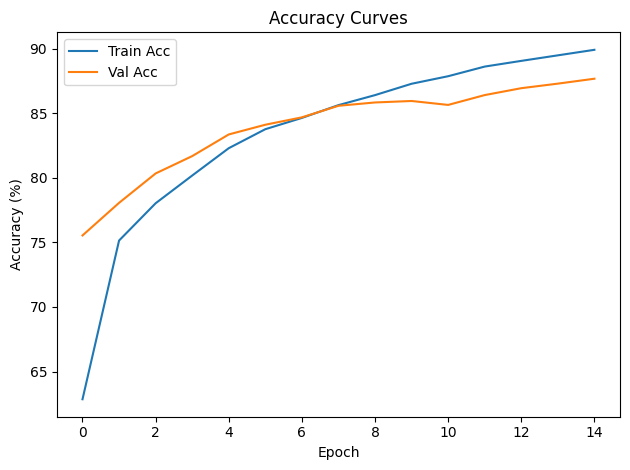


=== Training ResCNN-SGD-StepLR-WD0.0001 ===
Training on cuda...
Epoch 1/15 | Val Loss: 0.7738, Val Acc: 75.46% | Time: 4.28s
Epoch 2/15 | Val Loss: 0.6113, Val Acc: 78.37% | Time: 4.44s
Epoch 3/15 | Val Loss: 0.5465, Val Acc: 80.07% | Time: 4.38s
Epoch 4/15 | Val Loss: 0.5322, Val Acc: 80.76% | Time: 4.11s
Epoch 5/15 | Val Loss: 0.5271, Val Acc: 80.88% | Time: 4.13s
Epoch 6/15 | Val Loss: 0.5212, Val Acc: 81.09% | Time: 4.11s
Epoch 7/15 | Val Loss: 0.5208, Val Acc: 81.25% | Time: 4.09s
Epoch 8/15 | Val Loss: 0.5215, Val Acc: 81.28% | Time: 4.13s
Epoch 9/15 | Val Loss: 0.5192, Val Acc: 81.38% | Time: 4.38s
Epoch 10/15 | Val Loss: 0.5207, Val Acc: 81.16% | Time: 4.16s
Epoch 11/15 | Val Loss: 0.5204, Val Acc: 81.32% | Time: 4.19s
Epoch 12/15 | Val Loss: 0.5204, Val Acc: 81.15% | Time: 4.17s
Early stopping!


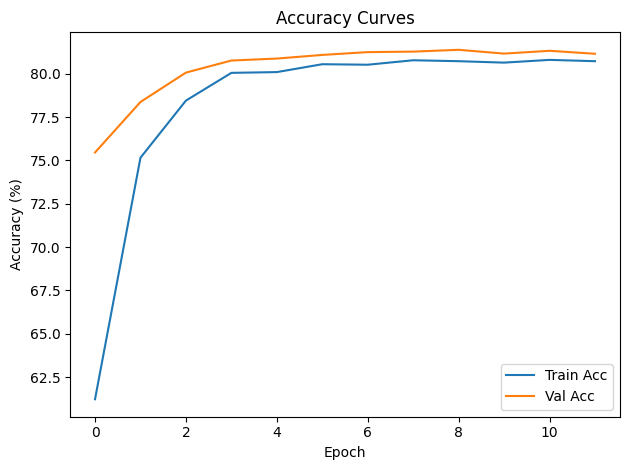


=== Training ResCNN-SGD-CosineAnnealingLR-WD0.0001 ===
Training on cuda...
Epoch 1/15 | Val Loss: 0.8064, Val Acc: 74.97% | Time: 4.34s
Epoch 2/15 | Val Loss: 0.6289, Val Acc: 78.26% | Time: 4.33s
Epoch 3/15 | Val Loss: 0.5546, Val Acc: 80.13% | Time: 4.30s
Epoch 4/15 | Val Loss: 0.5114, Val Acc: 81.49% | Time: 4.32s
Epoch 5/15 | Val Loss: 0.4756, Val Acc: 82.79% | Time: 4.49s
Epoch 6/15 | Val Loss: 0.4483, Val Acc: 83.92% | Time: 4.17s
Epoch 7/15 | Val Loss: 0.4344, Val Acc: 84.34% | Time: 4.18s
Epoch 8/15 | Val Loss: 0.4185, Val Acc: 84.70% | Time: 4.16s
Epoch 9/15 | Val Loss: 0.4073, Val Acc: 85.22% | Time: 4.20s
Epoch 10/15 | Val Loss: 0.4008, Val Acc: 85.23% | Time: 4.19s
Epoch 11/15 | Val Loss: 0.3963, Val Acc: 85.61% | Time: 4.22s
Epoch 12/15 | Val Loss: 0.3932, Val Acc: 85.67% | Time: 4.14s
Epoch 13/15 | Val Loss: 0.3913, Val Acc: 85.58% | Time: 4.14s
Epoch 14/15 | Val Loss: 0.3909, Val Acc: 85.74% | Time: 4.15s
Epoch 15/15 | Val Loss: 0.3909, Val Acc: 85.74% | Time: 4.16s


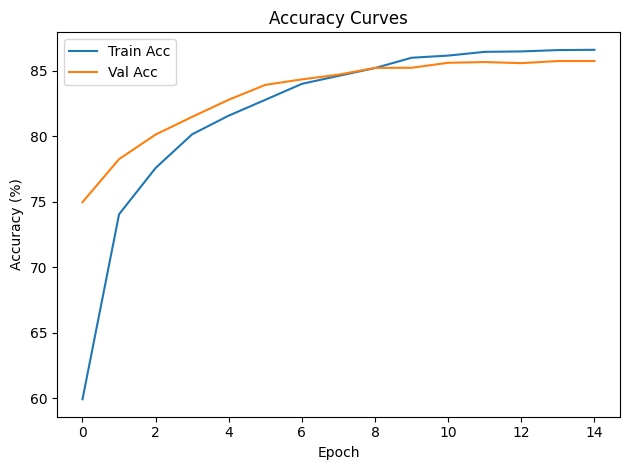


=== Training ResCNN-RMSprop-ReduceLROnPlateau-WD0.0001 ===
Training on cuda...
Epoch 1/15 | Val Loss: 0.7970, Val Acc: 68.62% | Time: 4.40s
Epoch 2/15 | Val Loss: 0.6211, Val Acc: 76.50% | Time: 4.42s
Epoch 3/15 | Val Loss: 0.3944, Val Acc: 85.21% | Time: 4.39s
Epoch 4/15 | Val Loss: 0.4222, Val Acc: 83.97% | Time: 4.42s
Epoch 5/15 | Val Loss: 0.6960, Val Acc: 77.27% | Time: 4.53s
Epoch 6/15 | Val Loss: 0.3863, Val Acc: 86.90% | Time: 4.56s
Epoch 7/15 | Val Loss: 0.2892, Val Acc: 89.33% | Time: 4.45s
Epoch 8/15 | Val Loss: 3.8456, Val Acc: 54.75% | Time: 4.45s
Epoch 9/15 | Val Loss: 0.3793, Val Acc: 86.65% | Time: 4.37s
Epoch 10/15 | Val Loss: 0.4736, Val Acc: 85.16% | Time: 4.35s
Early stopping!


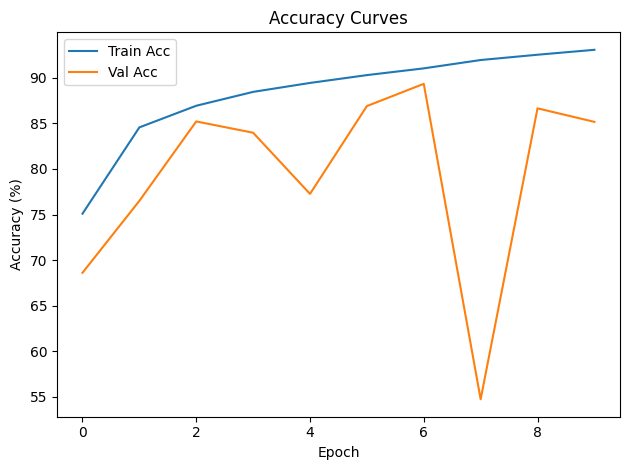


=== Training ResCNN-RMSprop-StepLR-WD0.0001 ===
Training on cuda...
Epoch 1/15 | Val Loss: 1.3490, Val Acc: 59.47% | Time: 4.40s
Epoch 2/15 | Val Loss: 0.4586, Val Acc: 82.47% | Time: 4.42s
Epoch 3/15 | Val Loss: 0.9945, Val Acc: 75.40% | Time: 4.39s
Epoch 4/15 | Val Loss: 0.2767, Val Acc: 89.75% | Time: 4.43s
Epoch 5/15 | Val Loss: 0.2681, Val Acc: 90.08% | Time: 4.38s
Epoch 6/15 | Val Loss: 0.2743, Val Acc: 90.32% | Time: 4.44s
Epoch 7/15 | Val Loss: 0.2664, Val Acc: 90.56% | Time: 4.55s
Epoch 8/15 | Val Loss: 0.2653, Val Acc: 90.60% | Time: 4.59s
Epoch 9/15 | Val Loss: 0.2663, Val Acc: 90.68% | Time: 4.68s
Epoch 10/15 | Val Loss: 0.2657, Val Acc: 90.65% | Time: 4.75s
Epoch 11/15 | Val Loss: 0.2657, Val Acc: 90.59% | Time: 4.47s
Epoch 12/15 | Val Loss: 0.2676, Val Acc: 90.68% | Time: 4.82s
Early stopping!


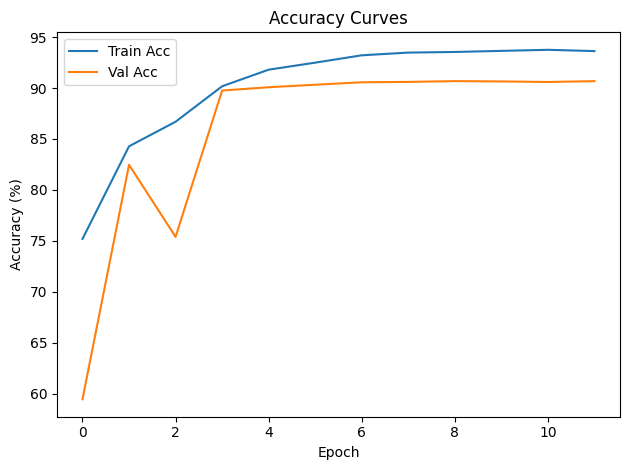


=== Training ResCNN-RMSprop-CosineAnnealingLR-WD0.0001 ===
Training on cuda...
Epoch 1/15 | Val Loss: 0.6301, Val Acc: 77.37% | Time: 4.79s
Epoch 2/15 | Val Loss: 0.3623, Val Acc: 86.63% | Time: 4.60s
Epoch 3/15 | Val Loss: 0.3609, Val Acc: 86.92% | Time: 4.56s
Epoch 4/15 | Val Loss: 1.6381, Val Acc: 72.79% | Time: 4.46s
Epoch 5/15 | Val Loss: 0.3101, Val Acc: 88.53% | Time: 4.44s
Epoch 6/15 | Val Loss: 0.2884, Val Acc: 89.55% | Time: 4.50s
Epoch 7/15 | Val Loss: 0.3058, Val Acc: 89.22% | Time: 4.54s
Epoch 8/15 | Val Loss: 0.3271, Val Acc: 88.30% | Time: 4.40s
Epoch 9/15 | Val Loss: 0.3063, Val Acc: 90.24% | Time: 4.35s
Epoch 10/15 | Val Loss: 0.3927, Val Acc: 88.82% | Time: 4.31s
Epoch 11/15 | Val Loss: 0.4178, Val Acc: 89.25% | Time: 4.30s
Epoch 12/15 | Val Loss: 0.3728, Val Acc: 90.70% | Time: 4.33s
Epoch 13/15 | Val Loss: 0.3938, Val Acc: 90.74% | Time: 4.30s
Epoch 14/15 | Val Loss: 0.4296, Val Acc: 90.82% | Time: 4.36s
Epoch 15/15 | Val Loss: 0.4289, Val Acc: 90.81% | Time: 4.55s

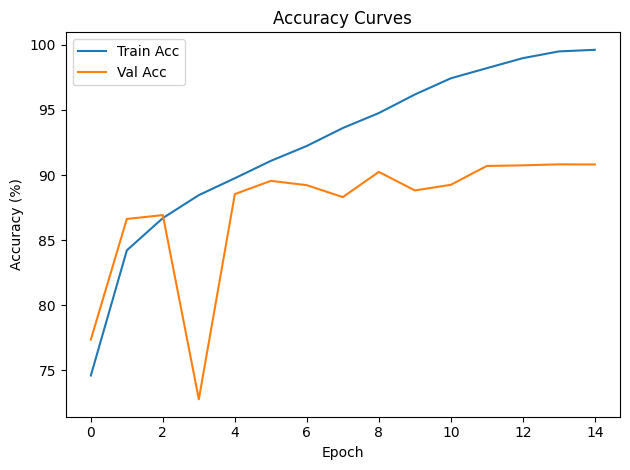


=== Best model (by validation accuracy) ===
Best model: DeepCNN-RMSprop-CosineAnnealingLR-WD0.0001 with validation accuracy: 92.24%

=== Evaluating best model (DeepCNN-RMSprop-CosineAnnealingLR-WD0.0001) on test set ===
Test Accuracy: 0.9222


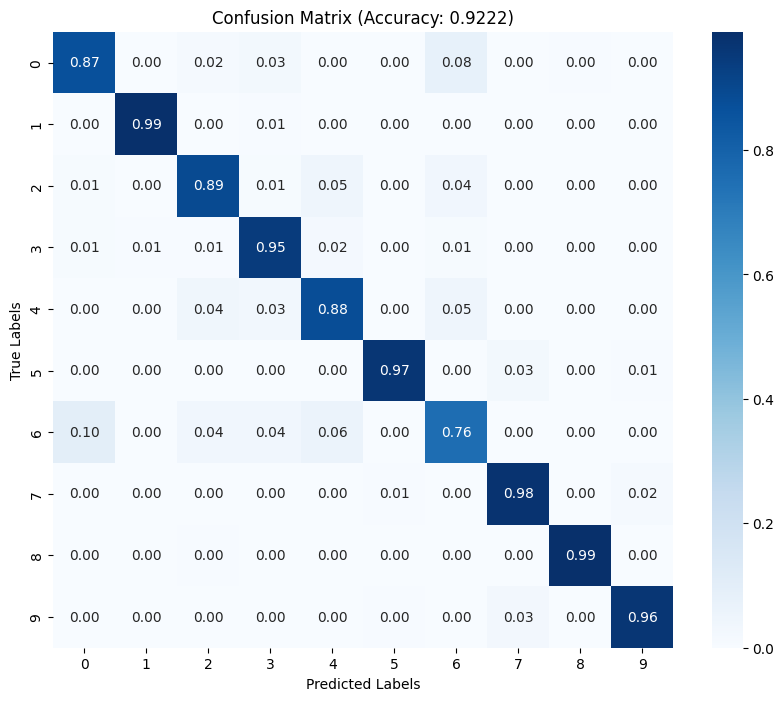

In [20]:
best_model_cnn, best_model_name_cnn,test_acc_cnn = run_experiments_cnn()

From the confusion matrix we can see that the model makes mistakes mostly while identifying **categories 2,4 and 6**, which are all tops and identifying them can sometimes be hard even for human eye.

## Final Model

For the final model, I will select the **best-performing CNN**, which achieves an 92.2% accuracy on the test dataset (unseen data). This is a solid result.

In [21]:
best_model = best_model_cnn

## Evaluation

Loading data for final model evaluation:

In [22]:
df_eval = pd.read_csv("evaluate.csv")

In [23]:
X_df_eval = df_eval.drop('ID', axis=1)

In [24]:
X_eval = torch.tensor(X_df_eval.values / 255.0, dtype=torch.float32)

In [25]:
X_eval = X_eval.view(-1, 1, 32, 32)

In [26]:
eval_loader = DataLoader(TensorDataset(X_eval), batch_size=64, shuffle=False)

Saving predictions to `results.csv`

In [27]:
predictions = []
best_model.eval()

with torch.no_grad():
    for data in eval_loader:
        images = data[0].to(myDeviceCnn)
        outputs = best_model(images)
        _, predicted = torch.max(outputs.data, 1)
        predictions.extend(predicted.cpu().numpy())

results = pd.DataFrame({'ID': range(len(predictions)), 'label': predictions})

results.to_csv('results.csv', index=False)

Plotting first 10 images of evaluation dataset to manually check for correct predictions:

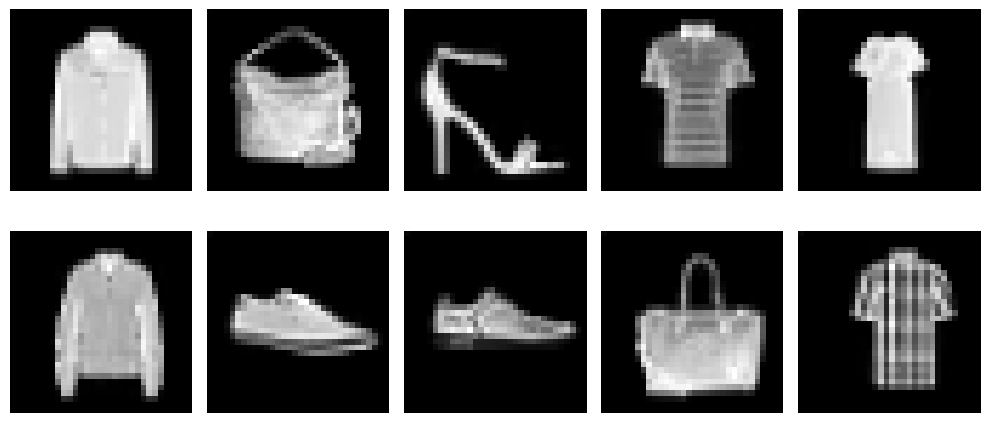

In [28]:
images = df_eval.iloc[:10, :1024]


fig, axs = plt.subplots(2, 5, figsize=(10, 5))
axs = axs.ravel()

for i, img in enumerate(images.values):
    axs[i].imshow(img.reshape(32, 32), cmap='gray')
    axs[i].axis('off')

plt.tight_layout()
plt.show()